<a href="https://colab.research.google.com/github/Prasang-Biyani/walmart-categorical-profiling/blob/main/walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#```Walmart```

[Walmart Inc.](https://www.walmart.com/) (formerly Wal-Mart Stores, Inc.) is an American multinational retail corporation that operates a chain of hypermarkets (also called supercenters), discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in nearby Rogers, Arkansas in 1962 and incorporated under Delaware General Corporation Law on October 31, 1969. It also owns and operates Sam's Club retail warehouses.


#```Business Problem```

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

#```Solution Approach (High Level)```


*   Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
*   Inference after computing the average female and male expenses.
*   Use the Central limit theorem (https://en.wikipedia.org/wiki/Central_limit_theorem) to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
*   Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

In [ ]:
walmart = pd.read_csv('data.csv')

In [ ]:
walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
# Dataset shape
walmart.shape

(550068, 10)

In [ ]:
# Dataset columns
walmart.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

## <font color="red">Features Description</font>

Dataset contains 550,068 datapoints with 10 features.

Following are the feature characteristics:

1. User_ID:	User ID
2. Product_ID:	Product ID
3. Gender:	Sex of the customers
4. Age:	Age range of the customers
5. Occupation:	Occupation(Masked) of the customer
6. City_Category:	Category of the City (A,B,C) like Tier-1, Tier-2, and Tier-3.
7. StayInCurrentCityYears:	Number of years stay in current city
8. Marital_Status:	Marital Status
9. ProductCategory:	Product Category (Masked) 
10. Purchase:	Purchase Amount

In [ ]:
# data types of the dataset
walmart.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
walmart.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There are no missing values in the dataset.

In [ ]:
walmart.duplicated().sum()

0

There are no duplicates in the dataset.

In [ ]:
# Number of unique values in each column
for i in walmart.columns:
  print(i, ':', walmart[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


## <font color="red">Observations</font>


*   There are 5891 unique customers
*   There are 3631 unique products available in the walmart stores.
*   There are 7 different age groups customers.
*   Walmart customers have 21 different types of Occupation.
*   Walmart has 20 different product categories.
*   Purchase has lot of unique values, making it a continuous variable.





In [ ]:
walmart['User_ID'].value_counts(normalize=True)

1001680    0.001865
1004277    0.001780
1001941    0.001633
1001181    0.001567
1000889    0.001496
             ...   
1002690    0.000013
1002111    0.000013
1005810    0.000013
1004991    0.000013
1000708    0.000011
Name: User_ID, Length: 5891, dtype: float64

##<font color="red">Observations</font>
1. User ID 1001680 is the most frequent customer, followed by 1004277 and 1001941 respectively.
2. User ID 1000708 is the least frequent customer. Maybe he/she buys from a different store.




In [ ]:
walmart['Product_ID'].value_counts(normalize=True)

P00265242    0.003418
P00025442    0.002936
P00110742    0.002931
P00112142    0.002840
P00057642    0.002672
               ...   
P00314842    0.000002
P00298842    0.000002
P00231642    0.000002
P00204442    0.000002
P00066342    0.000002
Name: Product_ID, Length: 3631, dtype: float64

## <font color="red">Observations</font>

1. P00265242 is the most sold product in Walmart stores, followed by P00025442 and P00110742 respectively.
2. P00066342, P00204442, P00231642 are the least sold product in Walmart stores.

In [ ]:
walmart['Gender'].value_counts(normalize=True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

##<font color="red">Observations</font>

Male is the most frequent buyer contributing 75% of the sales, followed by women contributing 25% of sales.

In [ ]:
walmart['Age'].value_counts(normalize=True)

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

##<font color="red">Observations</font>

1. Customers in the mid-20s to 30s age range are the most frequent customers of Walmart, contributing 40% of sales.
2. The mid 30s to 40s age range are the second most frequent customers of Walmart, contributing 20% of sales.
3. The few percentage (2%) of the customers are in the age range of 0-17.

In [ ]:
walmart['Occupation'].value_counts(normalize=True)

4     0.131453
0     0.126599
7     0.107501
1     0.086218
17    0.072796
20    0.061014
12    0.056682
14    0.049647
2     0.048336
16    0.046123
6     0.037005
3     0.032087
10    0.023506
5     0.022137
15    0.022115
11    0.021063
19    0.015382
13    0.014049
18    0.012039
9     0.011437
8     0.002811
Name: Occupation, dtype: float64

## <font color="red">Observations</font>

1. Occupation category 4 is the most popular occupation, contributing 13%.
2. Followed by category 0, which contributes 12% of the overall occupation.
3. Category 8 and 9 are the least common occupations, contributing 0.2% of the occupations.

In [ ]:
walmart['City_Category'].value_counts(normalize=True)

B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64

##<font color="red">Observations</font>

City B is the most popular city category among Walmart customers, followed by C and A.


In [ ]:
walmart['Stay_In_Current_City_Years'].value_counts(normalize=True)

1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: Stay_In_Current_City_Years, dtype: float64

## <font color="red">Observations</font>

1. The majority of customers only stay in the city for one year, making up 35% of the customers.
2. followed by two years in the same city, accounting for 18.5% of customers
3. Very few customers relocate to a different city within a year.

In [ ]:
walmart['Marital_Status'].value_counts(normalize=True)

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64

##<font color="red">Observations</font>

60% of customers have **0** Martial Status, while 40% have **1** Martial Status.



In [ ]:
walmart['Product_Category'].value_counts(normalize=True)

5     0.274390
1     0.255201
8     0.207111
11    0.044153
2     0.043384
6     0.037206
3     0.036746
4     0.021366
16    0.017867
15    0.011435
13    0.010088
10    0.009317
12    0.007175
7     0.006765
18    0.005681
20    0.004636
19    0.002914
14    0.002769
17    0.001051
9     0.000745
Name: Product_Category, dtype: float64

##<font color="red">Observations</font>

1. The product category of 5 is the most popular in Walmart stores, making up 27% of sales.
2. Followed by category 1, contributing to its 25% of sales.
3. Product categories 9 and 17 are the least popular among Walmart customers.

In [ ]:
# Executing describe() instead of value_counts(), because Purchase is a continuous variable. 
walmart['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

##<font color="red">Observations (Assuming amount is in $)</font>

1. The average purchase amount spent by a customer is \$9263.
2. The minimum and maximum amount spent by the customer is \$12 and \$23961 Dollars respectively.
3. Median amount spent by the customer is \$8047.

In [ ]:
walmart.groupby(by=['User_ID', 'Product_ID'])['Purchase'].sum().sort_values(ascending=False)

User_ID  Product_ID
1001474  P00052842     23961
1002272  P00052842     23961
1003160  P00052842     23961
1005596  P00117642     23960
1003045  P00052842     23960
                       ...  
1000155  P00370293        12
1004029  P00370293        12
1002203  P00370293        12
1001322  P00370293        12
1005904  P00370853        12
Name: Purchase, Length: 550068, dtype: int64

##<font color="red">Observations</font>

1. The most money was spent on the product P00052842 by users 1001474, 1002272, and 1003160.
2. The user 1000155, 1004029, 1002203, and 1001322 spent the least amount of money on the product P00370293.

In [ ]:
walmart.groupby(by='Gender')['Purchase'].mean().sort_values(ascending=False)

Gender
M    9437.526040
F    8734.565765
Name: Purchase, dtype: float64

##<font color="red"> Observations </font>

The average purchase amount spent by the male customer is \$9437.52, while the female customer spent \$8734.56.

In [ ]:
walmart.groupby(by='Marital_Status')['Purchase'].mean().sort_values(ascending=False)

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

##<font color="red"> Observations </font>

The average purchase amount spent by a Marital Status 0 customer is \$9265.07, while a Marital Status 1 customer spent \$9261.17.

There is not much difference in the purchase amount spent by both marital statuses.

In [ ]:
walmart.groupby(by='Age')['Purchase'].mean().sort_values(ascending=False)

Age
51-55    9534.808031
55+      9336.280459
36-45    9331.350695
26-35    9252.690633
46-50    9208.625697
18-25    9169.663606
0-17     8933.464640
Name: Purchase, dtype: float64

##<font color="red"> Observations </font>

1. The average purchase amount spent by the 51-55 age group is the maximum among the other age groups.
2. The average amount spent by those aged 36-45 and those aged 55+ is nearly identical.
3. The age group between 0-17 has a very low average purchase.
4. Overall, there is not much difference in the average purchase amount across all age groups.

In [ ]:
walmart.groupby(by='Occupation')['Purchase'].mean().sort_values(ascending=False)

Occupation
17    9821.478236
12    9796.640239
15    9778.891163
8     9532.592497
14    9500.702772
7     9425.728223
16    9394.464349
5     9333.149298
13    9306.351061
6     9256.535691
4     9213.980251
11    9213.845848
3     9178.593088
18    9169.655844
0     9124.428588
10    8959.355375
1     8953.193270
2     8952.481683
20    8836.494905
19    8710.627231
9     8637.743761
Name: Purchase, dtype: float64

##<font color="red"> Observations </font>

1. The average purchase amount spent by occupation category 17 is the highest.
2. Followed by the average amount spent by those categories of 12 and 15 is nearly identical.
3. The occupation category 9 has the lowest average purchase amount spent.


In [ ]:
walmart.groupby(by='City_Category')['Purchase'].mean().sort_values(ascending=False)

City_Category
C    9719.920993
B    9151.300563
A    8911.939216
Name: Purchase, dtype: float64

##<font color="red">Observations</font>

The average purchase amount spent by city category C is the highest, followed by B and A.

In [ ]:
walmart.groupby(by='Stay_In_Current_City_Years')['Purchase'].mean().sort_values(ascending=False)

Stay_In_Current_City_Years
2     9320.429810
3     9286.904119
4+    9275.598872
1     9250.145923
0     9180.075123
Name: Purchase, dtype: float64

##<font color="red"> Observations </font>

1. The customers who have stayed in their current city for 2 years have the highest average purchase amount.
2. Followed by the average amount spent by 3 and 4+ years is nearly identical.
3. Customers changing the city within 1 year, has the lowest purchase amount spent.


In [ ]:
walmart.groupby(by='Product_Category')['Purchase'].mean().sort_values(ascending=False)

Product_Category
10    19675.570927
7     16365.689600
6     15838.478550
9     15537.375610
15    14780.451828
16    14766.037037
1     13606.218596
14    13141.625739
2     11251.935384
17    10170.759516
3     10096.705734
8      7498.958078
5      6240.088178
11     4685.268456
18     2972.864320
4      2329.659491
12     1350.859894
13      722.400613
20      370.481176
19       37.041797
Name: Purchase, dtype: float64

##<font color="red">Observations</font>

1. The average amount in product category 10 is the highest. Maybe it's because the product is expensive.
2. Product category 19 has the lowest average. Maybe it's because the product is cheaper.

In [ ]:
walmart.groupby(by='Product_ID')['Purchase'].mean().sort_values(ascending=False)[:5]

Product_ID
P00086242    21256.505495
P00085342    20980.268116
P00200642    20468.773234
P00116142    20463.791277
P00119342    20448.756494
Name: Purchase, dtype: float64

In [ ]:
walmart.groupby(by='Product_ID')['Purchase'].mean().sort_values(ascending=False)[-5:]

Product_ID
P00372445    374.930705
P00375436    374.266585
P00371644    362.911012
P00370853     37.393643
P00370293     36.675159
Name: Purchase, dtype: float64

##<font color="red">Observations</font>

1. The average amount spent on Product ID P00086242 is the highest. followed by product IDs P00085342 and P00200642, respectively.
2. The most money is spent on Product ID P00370293 & P00370853. Maybe the product is cheaper.

In [ ]:
walmart.groupby(by='User_ID')['Purchase'].mean().sort_values(ascending=False)[:5]

User_ID
1003902    18577.893617
1005069    18490.166667
1005999    18345.944444
1001349    18162.739130
1003461    17508.700000
Name: Purchase, dtype: float64

In [ ]:
walmart.groupby(by='User_ID')['Purchase'].mean().sort_values(ascending=False)[-5:]

User_ID
1004636    3612.812500
1005944    3599.733333
1002744    3421.521739
1003598    2698.357143
1004486    2318.733333
Name: Purchase, dtype: float64

##<font color="red">Observations</font>

1. User 1003902 has the highest average expenditure.Users 1005069 and 1005999 came after them.
2. The average amount spent by users (1004486 & 1003598) is the lowest.

In [ ]:
walmart.groupby(by=['Gender', 'Age'])['Purchase'].mean().sort_values(ascending=False)

Gender  Age  
M       51-55    9705.094802
        36-45    9453.193643
        18-25    9440.942971
        55+      9438.195603
        26-35    9410.337578
        46-50    9357.471509
        0-17     9235.173670
F       51-55    9042.449666
        55+      9007.036199
        36-45    8959.844056
        46-50    8842.098947
        26-35    8728.251754
        18-25    8343.180201
        0-17     8338.771985
Name: Purchase, dtype: float64

##<font color="red">Observations</font>

1. In both genders, average expenditure is highest in the age group of 51-55.
2. The male gender's second highest average expenditure is between the ages of 36 and 44, while the female gender's is between the ages of 55 and plus.
3. The age group 0-17 has the lowest average expenditure in both genders. 

In [ ]:
walmart.groupby(by=['Gender', 'Product_ID'])['Purchase'].mean().sort_values(ascending=False)

Gender  Product_ID
F       P00306742     23672.000000
        P00107342     23525.000000
        P00290642     23113.000000
        P00086242     21586.306667
M       P00086242     21131.580808
                          ...     
F       P00371644       358.304688
        P00370853        39.239234
M       P00370293        36.830571
        P00370853        36.760263
F       P00370293        36.326446
Name: Purchase, Length: 6955, dtype: float64

##<font color="red">Observations</font>

1. Product ID P00306742 is the most popular product among female customers. P0086242 is the most popular product in Male.
2. The least popular product among male customers is P00370853. For female customers, P00370293 is the least popular product.

In [ ]:
walmart.groupby(by=['Gender', 'Occupation'])['Purchase'].mean().sort_values(ascending=False)

Gender  Occupation
F       18            10074.608696
M       12             9876.847492
        15             9872.778721
        17             9851.727696
        14             9804.566923
        8              9584.729114
F       17             9543.435734
M       7              9493.818898
        13             9485.148154
        16             9477.371520
        5              9446.089083
        4              9435.676366
F       15             9394.894979
M       6              9375.727101
F       8              9361.451524
M       10             9302.215302
        3              9279.059603
        11             9232.145350
        1              9231.961755
        0              9228.799538
        9              9226.694196
        2              9213.158472
F       12             9155.953301
M       18             9137.093398
F       7              9092.302553
        11             9090.800000
        6              9078.405882
        3              9055.138149
M

##<font color="red">Observations</font>

1. Occupation category 18, female customers, has the highest average expenditure.
2. While customers in occupation categories 12, 15, 17, 14, and 8 have the second highest average expenditure.
3. Occupation category 19, of male customers, has the lowest average expenditure.
4. Female customers in occupation category 10 have the lowest average expenditure.

In [ ]:
walmart.groupby(by=['Gender', 'City_Category'])['Purchase'].mean().sort_values(ascending=False)

Gender  City_Category
M       C                9913.567248
        B                9354.854433
F       C                9130.107518
M       A                9017.834470
F       A                8579.708576
        B                8540.677694
Name: Purchase, dtype: float64

##<font color="red">Observations</font>

1. City categories C and B have the highest average expenditure of the male customers.
2. Male and female customers in City Category A have the lowest average expenditure.
3. Female customers in City Category C spend the most money on average.

In [ ]:
walmart.groupby(by=['Gender', 'Marital_Status'])['Purchase'].mean().sort_values(ascending=False)

Gender  Marital_Status
M       0                 9453.756740
        1                 9413.817605
F       1                 8810.249789
        0                 8679.845815
Name: Purchase, dtype: float64

##<font color="red">Observations</font>

1. Male customers having Marital Status **0** has the highest average expenditure. While female having Marital Status **1** has the highest average expenditure.
2. Male customers having Marital Status **1** has the lowest average expenditure. While female having Marital Status **0** has the lowest average expenditure.

In [ ]:
walmart.groupby(by=['Gender', 'Product_Category'])['Purchase'].mean().sort_values(ascending=False)

Gender  Product_Category
F       10                  19692.076592
M       10                  19670.731264
F       7                   16394.853659
M       7                   16355.789777
        6                   15907.851009
F       9                   15724.314286
        6                   15596.428164
M       9                   15498.888235
        15                  14797.431350
        16                  14793.384056
F       15                  14695.326960
        16                  14681.491257
        14                  13747.362761
M       1                   13608.164721
F       1                   13597.162619
M       14                  12722.321111
F       2                   11407.496819
M       2                   11203.590520
F       3                   10262.656677
M       17                  10209.732558
        3                   10026.550081
F       17                   9846.403226
        8                    7499.924787
M       8                    749

<font color="red">Observations</font>

1. Product category 10 is popular among both sexes by average expenditure.
2. Simultaneously, product category 7 is the second most popular among both genders by average expenditure.
3. Product category 19 is the least popular among both sexes.

In [ ]:
walmart.groupby(by=['Gender', 'Stay_In_Current_City_Years'])['Purchase'].mean().sort_values(ascending=False)

Gender  Stay_In_Current_City_Years
M       2                             9502.486091
        3                             9491.916315
        1                             9421.145380
        4+                            9413.589778
        0                             9350.908869
F       4+                            8784.883738
        1                             8775.052244
        2                             8740.516357
        3                             8695.236582
        0                             8606.040497
Name: Purchase, dtype: float64

<font color="red">Observations</font>

1. Overall, male customers, irrespective of the duration of their stay in the current city, have the highest average expenditure compared to female customers.
2. Female customers who have been in the same city for more than four years have the highest average expenditure compared to those who have been there for less than four years.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Correlation
walmart_copy = walmart.copy()

walmart_copy['Gender'] = walmart_copy['Gender'].replace({"F": 0, "M": 1})

age_encoder = OrdinalEncoder()
walmart_copy['Age_transformed'] = age_encoder.fit_transform(walmart_copy['Age'].values.reshape(-1, 1))

walmart_copy['City_Category'] = walmart_copy['City_Category'].replace({"A": 0, "B": 1, "C": 2})

stay_city_encoder = OrdinalEncoder()
walmart_copy['Stay_City_Years_transformed'] = stay_city_encoder.fit_transform(walmart_copy['Stay_In_Current_City_Years'].values.reshape(-1, 1))

walmart_copy.drop(['User_ID', 'Age', 'Stay_In_Current_City_Years'], axis=1, inplace=True)


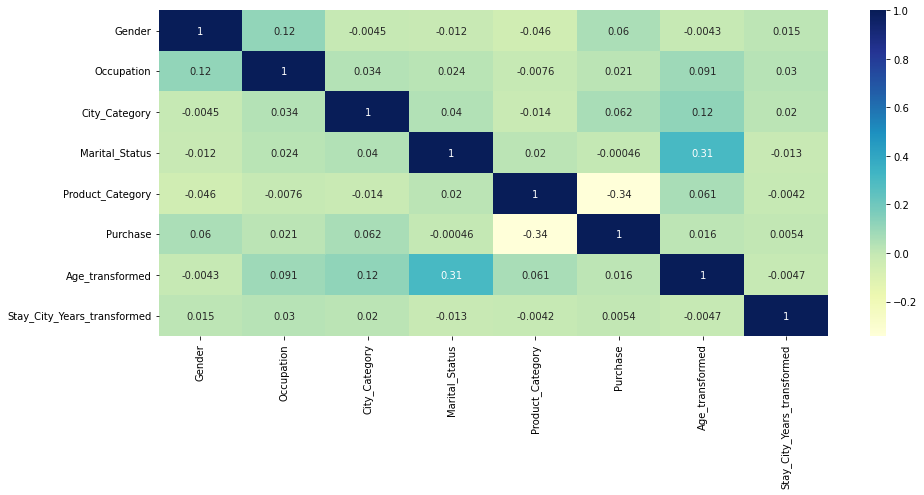

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(walmart_copy.corr(), cmap="YlGnBu", annot=True)
plt.show()

## <font color="red"> Observations </font>

1. The correlation between gender and occupation is 0.12.
2. The correlation coefficient between City_Category and Age_transformed is 0.12.
3. The correlation between marital status and age_transformed is the highest at 0.31.
4. The correlation between purchase and product_category is very high -0.34.

There is not a strong (either direction) linear correlation between the features.

The reason for the strong correlation between Marital Status and Age_transformed might be that as people get married, they get older.

The reason for the negative strong correlation between Purchase & Product_Category might be that customers prefer cheaper products.

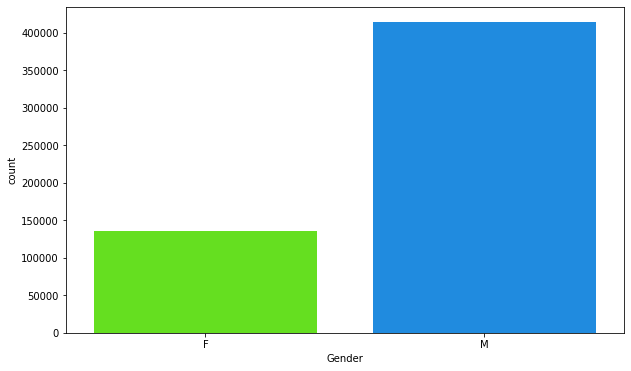

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=walmart, x='Gender', palette='gist_rainbow')
plt.show()

The same observations as in the preceding cell for Gender.

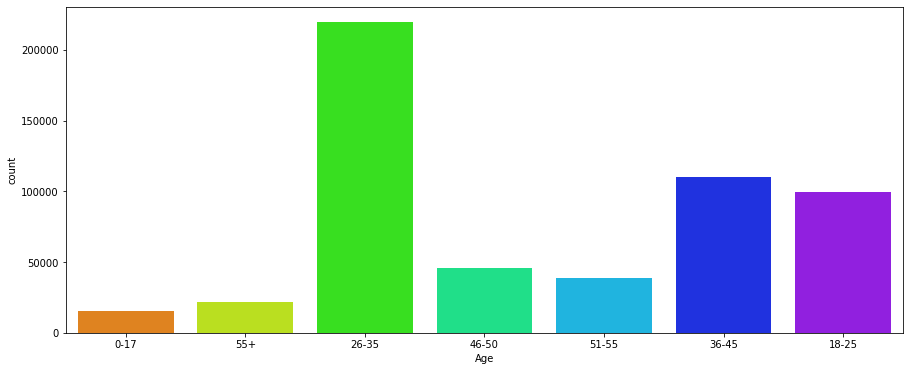

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=walmart, x='Age', palette='gist_rainbow')
plt.show()

The same observations as in the preceding cell for Age.

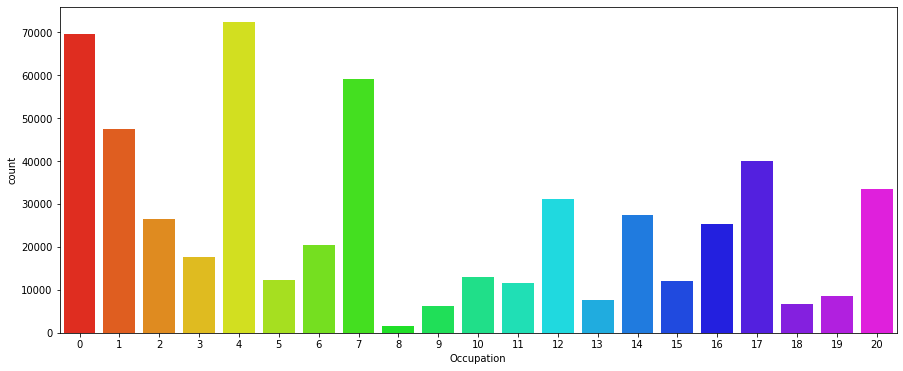

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=walmart, x='Occupation', palette='gist_rainbow')
plt.show()

The same observations as in the preceding cell for Occupation.

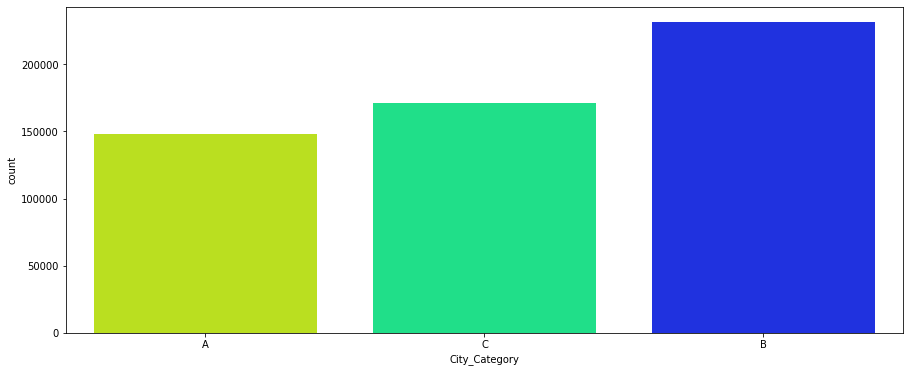

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=walmart, x='City_Category', palette='gist_rainbow')
plt.show()

The same observations as in the preceding cell for City_Category.

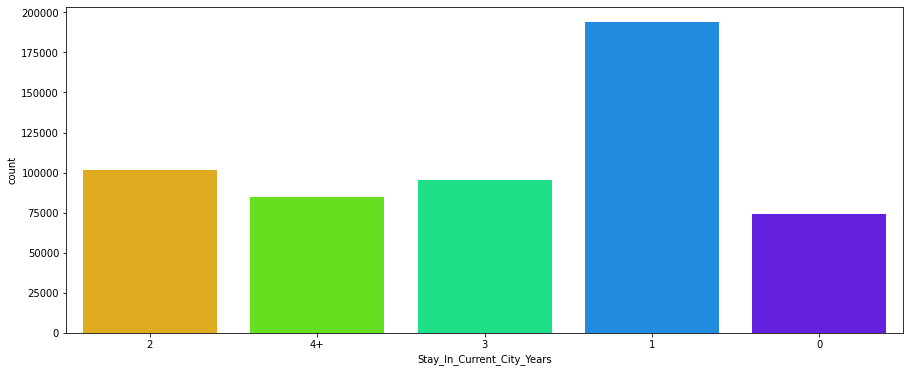

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=walmart, x='Stay_In_Current_City_Years', palette='gist_rainbow')
plt.show()

The same observations as in the preceding cell for Stay_In_Current_City_Years.

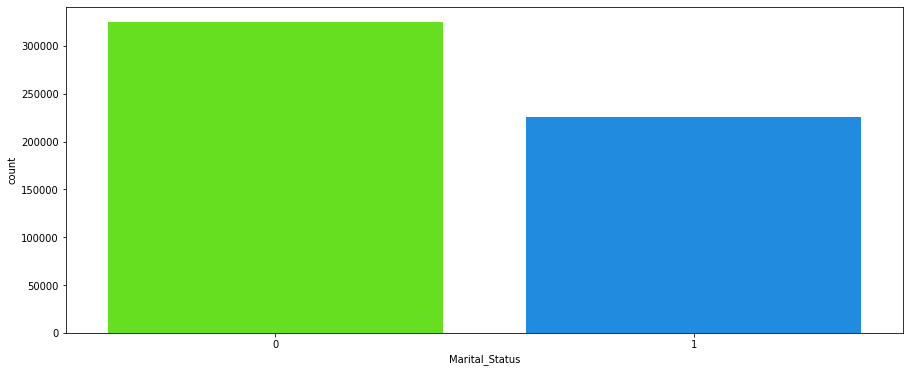

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=walmart, x='Marital_Status', palette='gist_rainbow')
plt.show()

The same observations as in the preceding cell for Marital_Status.

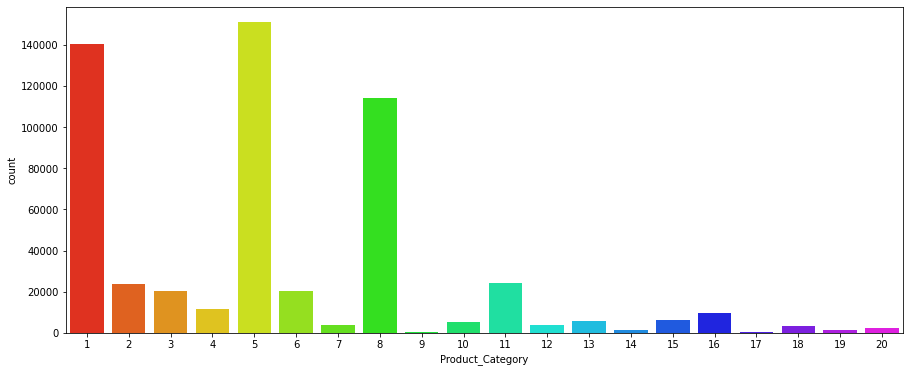

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=walmart, x='Product_Category', palette='gist_rainbow')
plt.show()

The same observations as in the preceding cell for Product_Category.

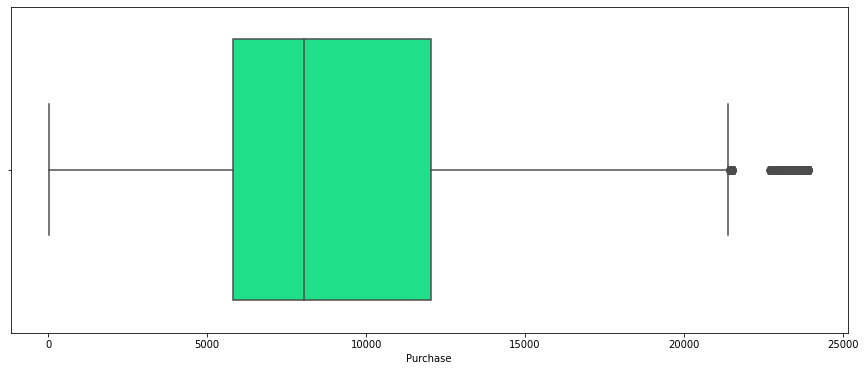

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(data=walmart, x='Purchase', palette='gist_rainbow')
plt.show()

In [ ]:
q75, q25 = np.percentile(walmart['Purchase'], [75 ,25])
purchase_iqr = q75 - q25
print("Inter Quartile Range (IQR) of Purchase is", purchase_iqr)

Inter Quartile Range (IQR) of Purchase is 6231.0


##<font color="red">Observations (Assuming Purchase is in $)</font>


1. The majority of the customers purchase roughly between \$5,500 and \$12,000  worth of items.
2. Some values have a purchase price of slightly more than \$22,000 dollars. (Outliers).
3. The difference in purchase prices between the 25th and 75th percentiles is \$6231.

In [ ]:
# Outlier Treatment
percentiles = walmart['Purchase'].quantile([0.05,0.99]).values
walmart_copy['Purchase'] = np.clip(walmart['Purchase'], percentiles[0], percentiles[1])

##<font color="red"> Outlier Treatment</font>

Here, because we have outliers, we are clipping the values between 0.05 and 0.99 percentile.

We are not removing the outliers, as there might be a loss of information.

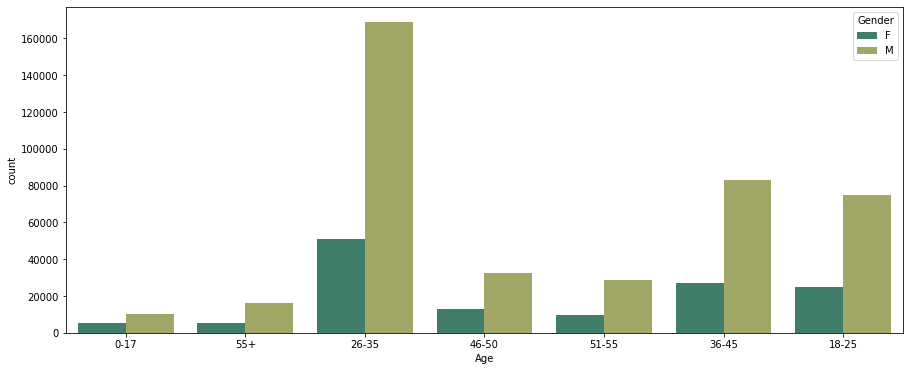

In [ ]:
#Relationship between Gender & Age
plt.figure(figsize=(15,6))
sns.countplot(data=walmart, x="Age", hue="Gender", palette="gist_earth")
plt.show()

##<font color="red">Observations</font>

1. There are a lot of males and females in the age range of 26-35.
2. Followed by a lot of males in the age range of 36-45.
3. The female age range between 36-45 and 18-25 is roughly the same.
4. There are slightly similar numbers of males in the age range between 46-50 and 51-55. Similarly, the same females aged 46-50 and 51-55.
5. Overall, in every age category, males outnumber females by count.

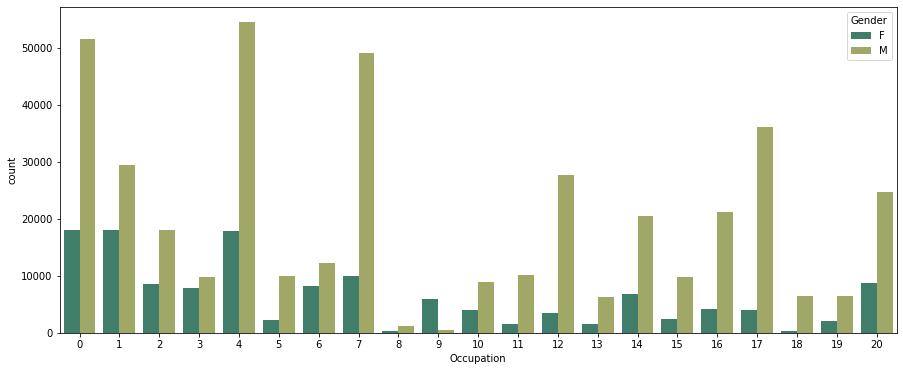

In [ ]:
#Relationship between Gender & Occupation
plt.figure(figsize=(15,6))
sns.countplot(data=walmart, x="Occupation", hue="Gender", palette="gist_earth")
plt.show()

##<font color="red">Observations</font>

1. In Occupation category 9, there are more females doing the job than males.
2. In the 3rd occupation category, the ratio of males to females is close to 1.
3. Female distribution is roughly the same in Occupation categories 0, 1, and 3.
4. Male distribution is roughly equal in occupation categories 14 and 16.
5. Males outnumber females in occupation categories 4 and 0.
6. Overall, in every occupation category except for category 9, males outnumber females by count.

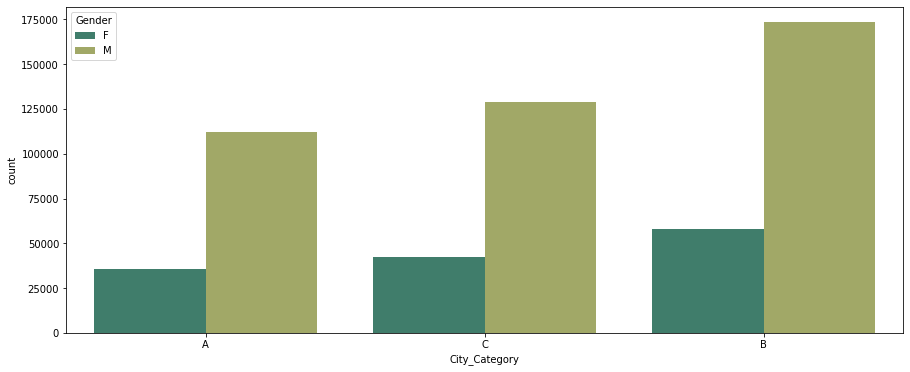

In [ ]:
#Relationship between Gender & City_Category
plt.figure(figsize=(15,6))
sns.countplot(data=walmart, x="City_Category", hue="Gender", palette="gist_earth")
plt.show()

##<font color="red">Observations</font>

1. The distribution of city categories in A and C is roughly the same for females. While in city category B, it is slightly higher than C.
2. The most popular city among Walmart customers is B, followed by A and C, respectively.

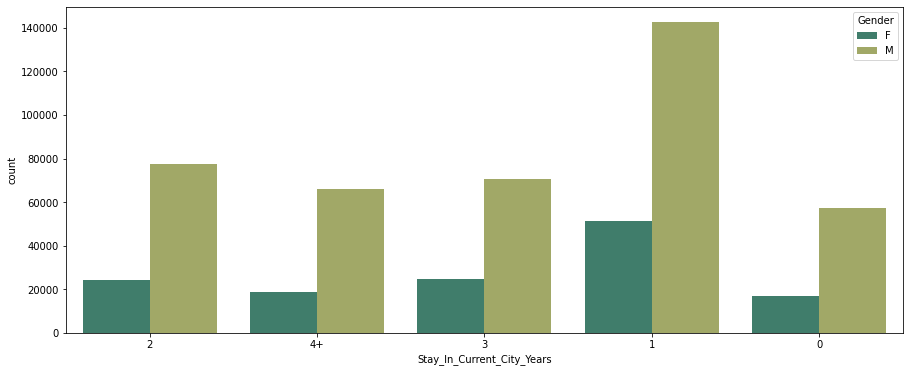

In [ ]:
#Relationship between Gender & Stay_In_Current_City
plt.figure(figsize=(15,6))
sns.countplot(data=walmart, x="Stay_In_Current_City_Years", hue="Gender", palette="gist_earth")
plt.show()

##<font color="red">Observations</font>

1. The majority of females prefer to stay in the same city for 2-3 years. while the majority of males prefer to stay in the same city for roughly 3–4+ years.
2. Few women want to live in the same city for less than a year.
3. Most males prefer to stay in the same city for one year.


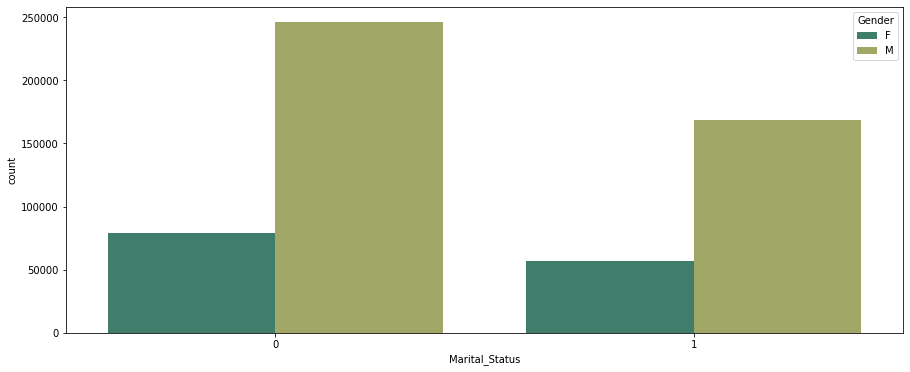

In [ ]:
#Relationship between Gender & Marital Status
plt.figure(figsize=(15,6))
sns.countplot(data=walmart, x="Marital_Status", hue="Gender", palette="gist_earth")
plt.show()

##<font color="red">Observations</font>

Because the male count is higher than the female count, they are dominating in both categories of marital status.

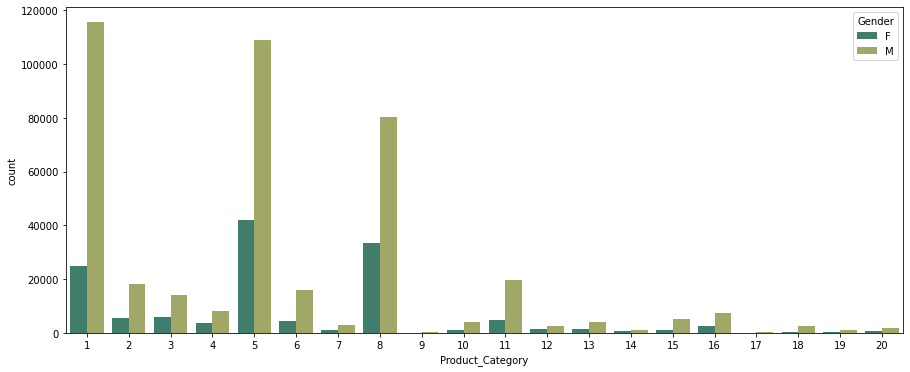

In [ ]:
#Relationship between Gender & Product Category
plt.figure(figsize=(15,6))
sns.countplot(data=walmart, x="Product_Category", hue="Gender", palette="gist_earth")
plt.show()

##<font color="red">Observations</font>

1. Product category 1 is popular among male customers, while category 5 is popular among female customers.
2. Product categories 14, 19, and 20 are equally bought by both genders.
3. Product categories 5 and 8 are the second and third most popular products among male customers.
4. Product categories 5 and 8 are the second and third most popular products among female customers.

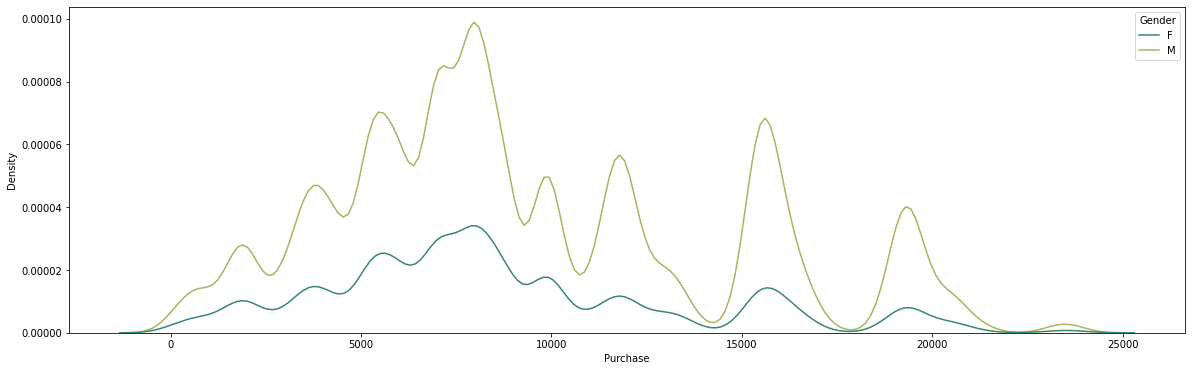

In [ ]:
#Relationship between Gender & Product Category
plt.figure(figsize=(20,6))
sns.kdeplot(data=walmart, x="Purchase", hue="Gender", palette="gist_earth")
plt.show()

##<font color="red">Observations</font>

1. There are a majority of male and female customers whose purchase amount is in the rough range of \$7000–\$9000.
2. There is a huge gap between male and female purchasing power.
3. There are some males whose purchase amount is between \$15,000 and \$17,000, and a few less males in the range of \$19,000 to \$20,000.


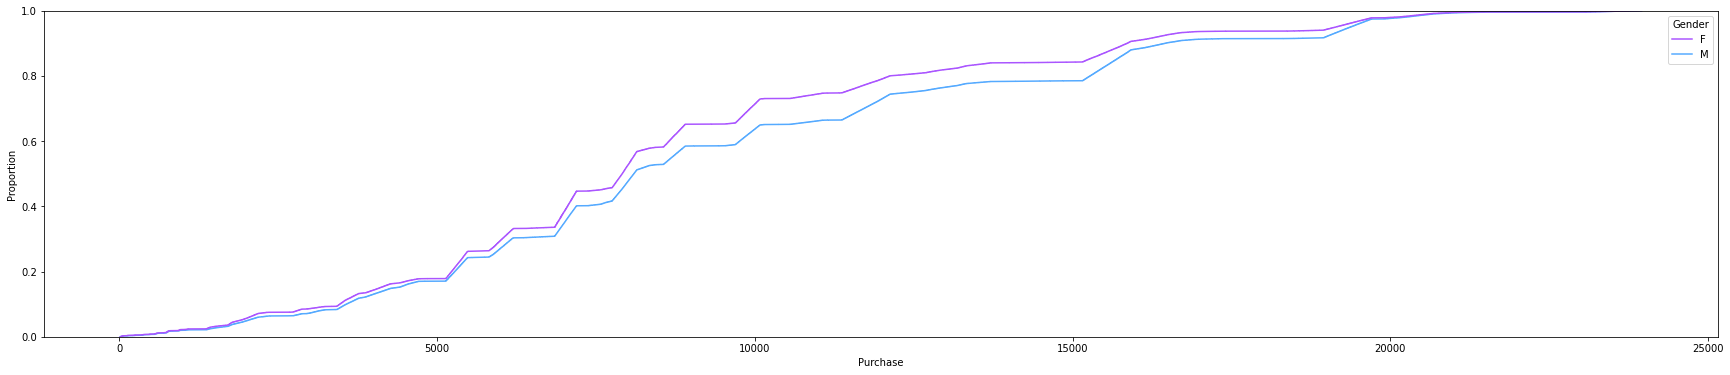

In [ ]:
plt.figure(figsize=(30,6))
# sns.kdeplot(data=walmart, x="Purchase", hue="Gender")
sns.ecdfplot(data=walmart, x='Purchase', complementary=False, palette='cool_r', hue='Gender')
plt.show()

##<font color="red">Observations</font>

The CDF purchase plot for both genders is almost identical. There is minor gap from \$6000 - \$15000.

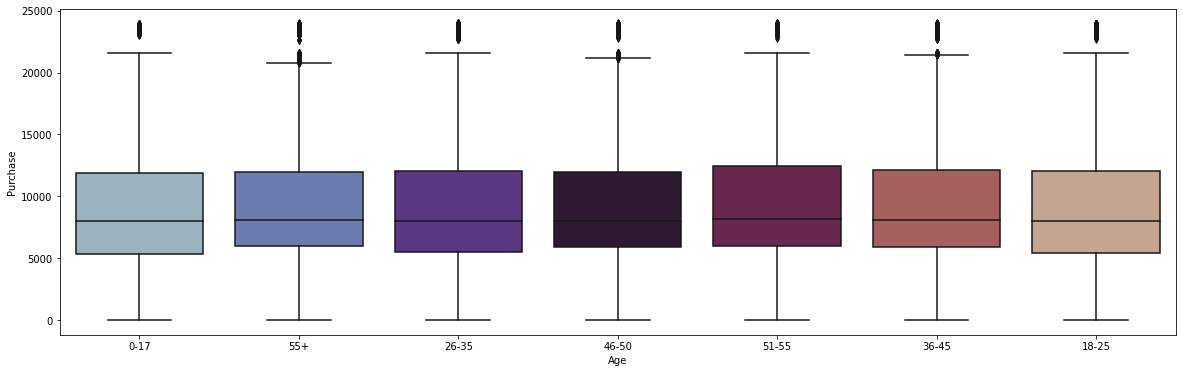

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(data=walmart, x="Age", y="Purchase", palette="twilight")
plt.show()

##<font color="red">Observations</font>

1. The median purchase at Walmart stores is nearly identical across all age groups.
2. The difference between the 25th and 75th percentile for all the age groups is nearly identical.
3. **Outliers** are present in the upper range of the Inter Quartile Range (IQR), but not in the lower range of the IQR for every age group.

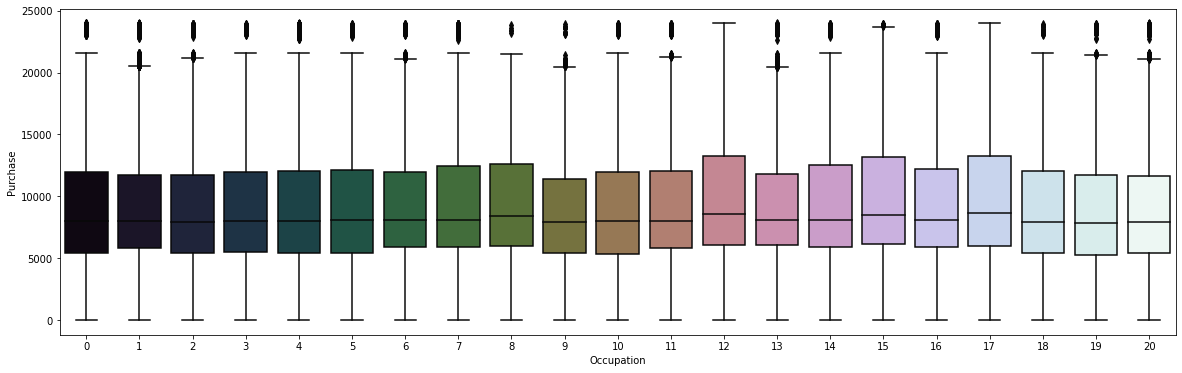

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(data=walmart, x="Occupation", y="Purchase", palette="cubehelix")
plt.show()

##<font color="red">Observations</font>

1. **Outliers** are present in every occupation categories w.r.t Purchase, except 12 & 17.
2. In Walmart stores, the median purchase is nearly identical across all occupation categories.
3. **Outliers** are present in the upper range of the Inter Quartile Range (IQR), but not in the lower range of the IQR for every occupation category.

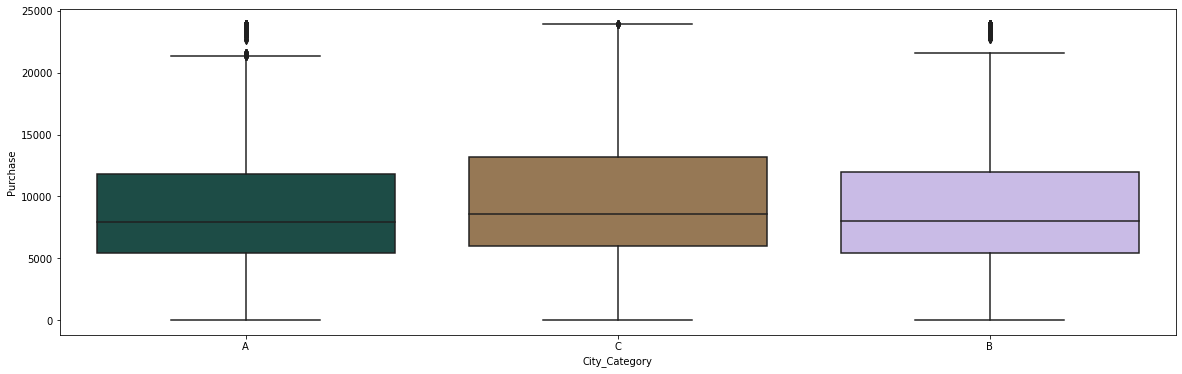

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(data=walmart, x="City_Category", y="Purchase", palette="cubehelix")
plt.show()

##<font color="red">Observations</font>

1. City Category C has few **outlier** purchases, whereas other categories have more.
2. **Outliers** are present in the upper range of the Inter Quartile Range (IQR), but not in the lower range of the IQR for every city category.
3. In walmart stores, the median purchase expenditure is nearly identical for every city category.

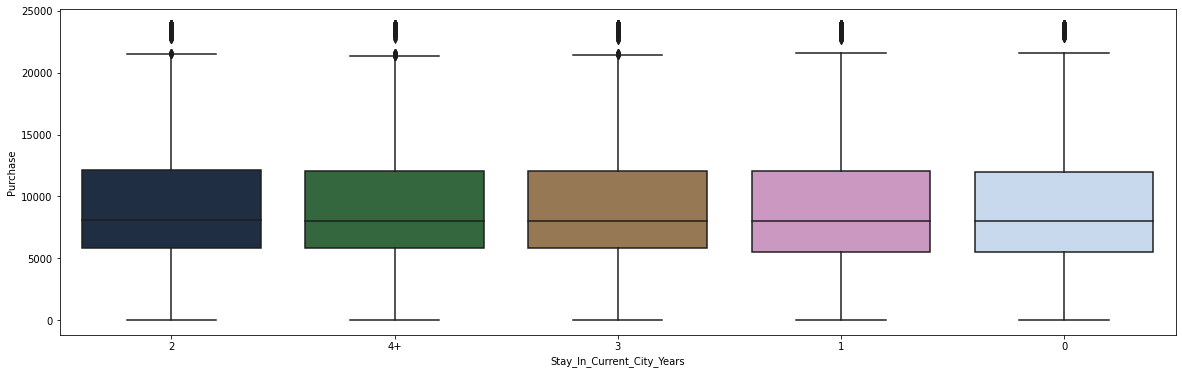

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(data=walmart, x="Stay_In_Current_City_Years", y="Purchase", palette="cubehelix")
plt.show()

##<font color="red">Observations</font>

1. In Walmart stores, the median purchase expenditure is nearly identical for all the stay durations in the same city.
2. The difference between the 25th and 75th percentile for the city years is nearly identical.
3. **Outliers** are present in the upper Inter Quartile Range (IQR), but not in the lower IQR, for all city years.

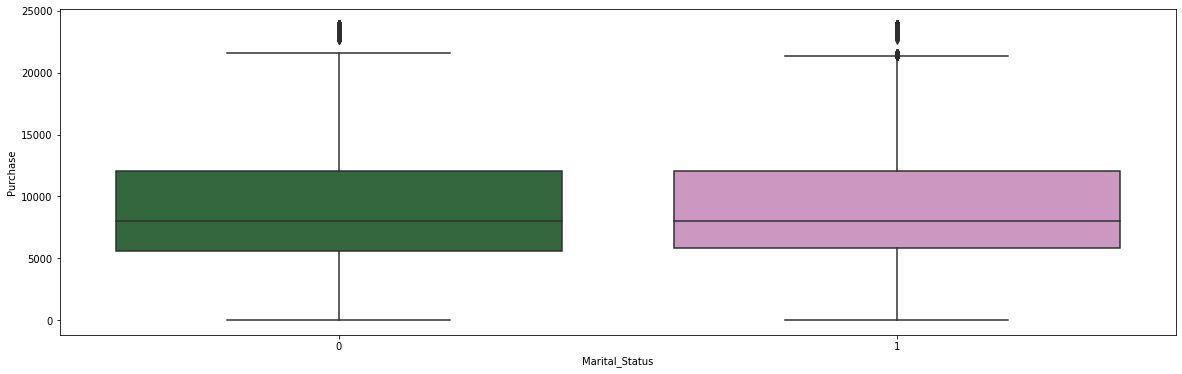

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(data=walmart, x="Marital_Status", y="Purchase", palette="cubehelix")
plt.show()

##<font color="red">Observations</font>

1. In Walmart stores, the median purchase expenditure is nearly identical irrespective of marital status.
2. Outliers are present in the upper interquartile range (IQR), but not in the lower IQR irrespective of their status.

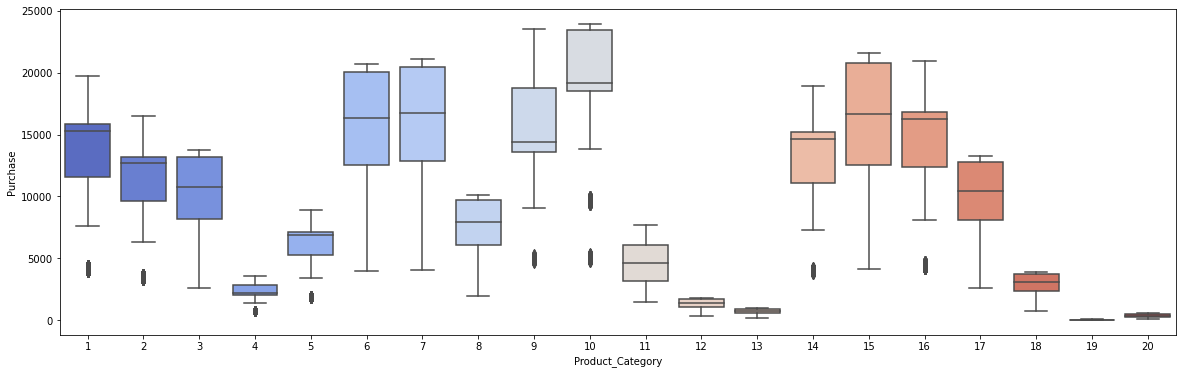

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(data=walmart, x="Product_Category", y="Purchase", palette="coolwarm")
plt.show()

<font color="red">Observations</font>

1. In 35% of the product categories (3, 6, 7, 8, 11, 15, 17), there are no **outliers** in terms of purchase.
2. Outliers in the lower IQR occur in 40% of the product categories (12, 13, 18, 19, 20).
3. The median of product categories 6 & 7, and 15 & 16 are nearly identical.

<Figure size 1440x432 with 0 Axes>

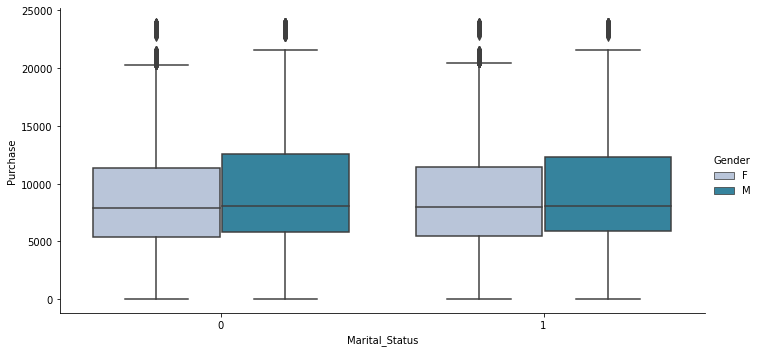

In [ ]:
plt.figure(figsize=(20,6))
sns.catplot(data=walmart, x="Marital_Status", y="Purchase", hue="Gender", kind="box", palette="PuBuGn", aspect=2)
plt.show()

##<font color="red">Observations</font>

1. The median Walmart store expenditure for both genders in Marital Status 0 and 1 is nearly identical.
2. There are more purchase outliers for both marital status in female gender.
3. The difference between the 25th and 75th percentiles in female customers is nearly identical for both marital status.
4. The difference between the 25th and 75th percentile in male customers is slightly more in marital status 1.

<Figure size 2880x720 with 0 Axes>

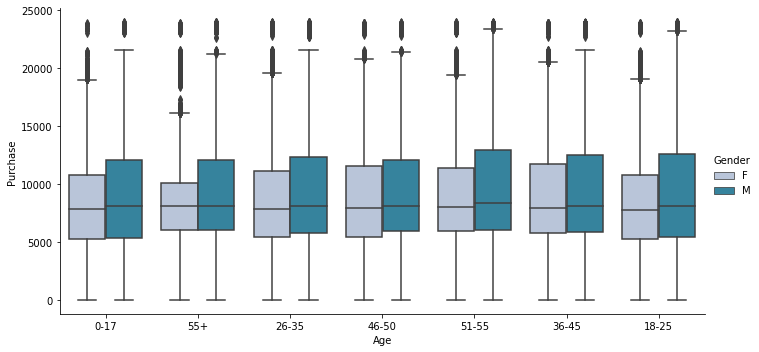

In [ ]:
plt.figure(figsize=(40,10))
sns.catplot(data=walmart, x="Age", y="Purchase", hue="Gender", kind="box", palette="PuBuGn", aspect=2)
plt.show()

##<font color="red">Observations</font>

1. The median purchase expenditure for all the age groups, in both genders, is nearly identical.
2. **Outliers** are present in the upper interquartile range (IQR) but not in the lower IQR in both genders, regardless of age group.
3. The maximum number of outliers is present in the 55+ age group of female customers.

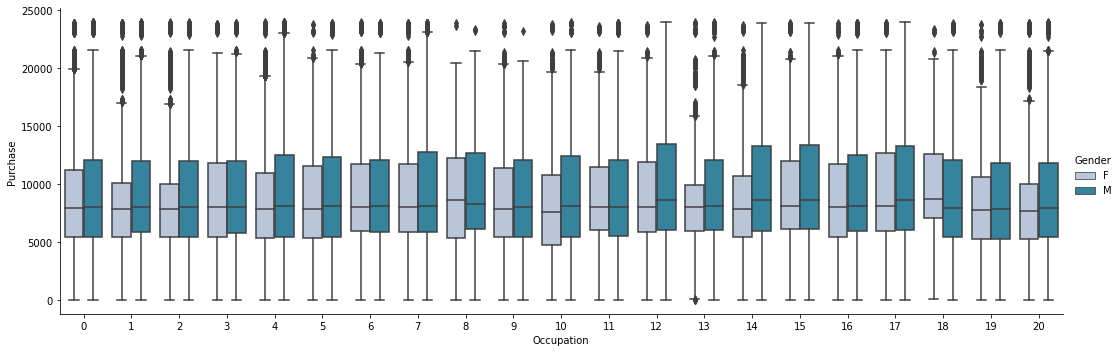

In [ ]:
# plt.figure(figsize=(100,20))
sns.catplot(data=walmart, x="Occupation", y="Purchase", hue="Gender", kind="box", palette="PuBuGn", aspect=3)
plt.show()

##<font color="red">Observations</font>

1. The median purchase expenditure for all occupations, irrespective of gender, is nearly identical.
2. For male customers in occupation categories 12, 14, and 17, there is no outlier in terms of purchase.
3. Outliers in both genders exist in the majority of occupations.
4. In Occupation category 13, there are some outliers in the low IQR.
5. **Outliers** are present in the upper interquartile range (IQR) but not in the lower IQR in both genders, regardless of occupation expect 13.

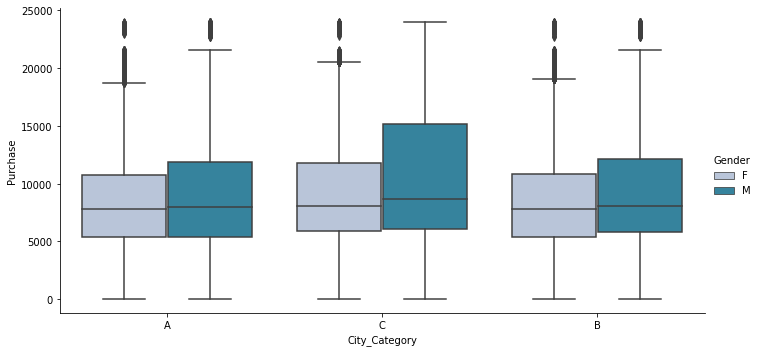

In [ ]:
# plt.figure(figsize=(100,20))
sns.catplot(data=walmart, x="City_Category", y="Purchase", hue="Gender", kind="box", palette="PuBuGn", aspect=2)
plt.show()

##<font color="red">Observations</font>

1. The median purchase expenditure for all city categories, regardless of gender, is nearly identical.
2. There is no outlier in the city in category C among male customers.
3. The difference between the 25th and 75th percentile is the maximum among male customers in city category C.
4. **Outliers** are present in the upper interquartile range (IQR) but not in the lower IQR in both genders, regardless of city category except C.


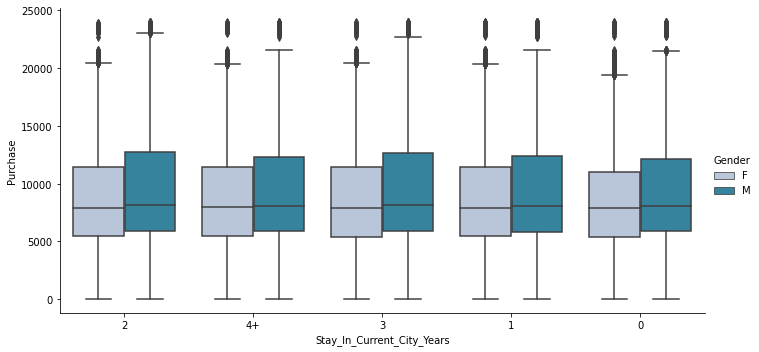

In [ ]:
# plt.figure(figsize=(100,20))
sns.catplot(data=walmart, x="Stay_In_Current_City_Years", y="Purchase", hue="Gender", kind="box", palette="PuBuGn", aspect=2)
plt.show()

##<font color="red">Observations</font>

1. Across all city stay years, the median purchase expenditure is nearly identical.
2. **Outliers** are present in the upper interquartile range (IQR) but not in the lower IQR in both genders, regardless of city stay years.


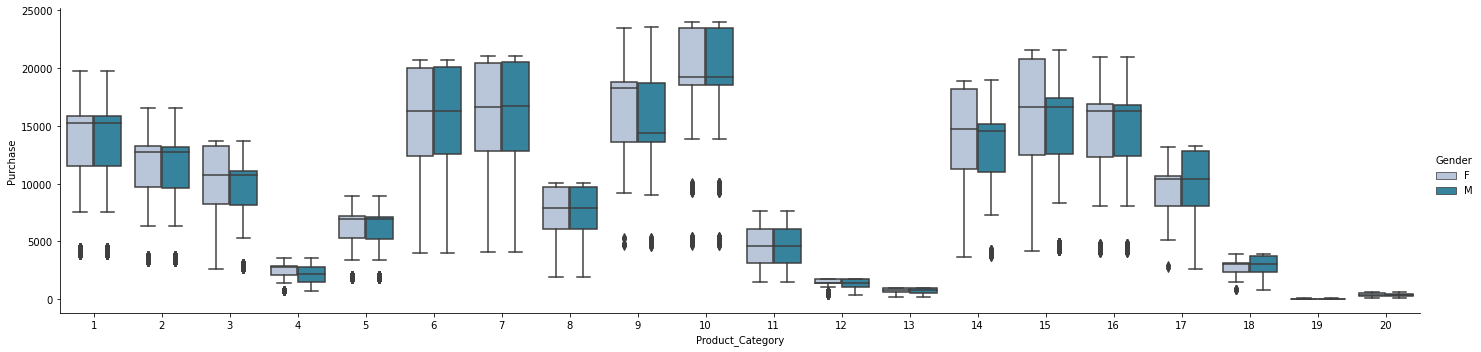

In [ ]:
# plt.figure(figsize=(100,20))
sns.catplot(data=walmart, x="Product_Category", y="Purchase", hue="Gender", kind="box", palette="PuBuGn", aspect=4)
plt.show()

##<font color="red">Observations</font>

1. For all genders, there is no outlier in product categories 6, 7, and 8.
2. There is no outlier for product category 3 and 14 for female customers.
3. In remaining product categories, there is no outlier in the upper IQR.

In [ ]:
walmart['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [ ]:
bins = [1, 1000,5000,10000,15000, 20000, 25000]
labels = ['<1000','1000-5000','5000-10000','10000-15000','15000-20000','20000+']
walmart['Purchase_bin'] = pd.cut(walmart['Purchase'], bins=bins, labels=labels)

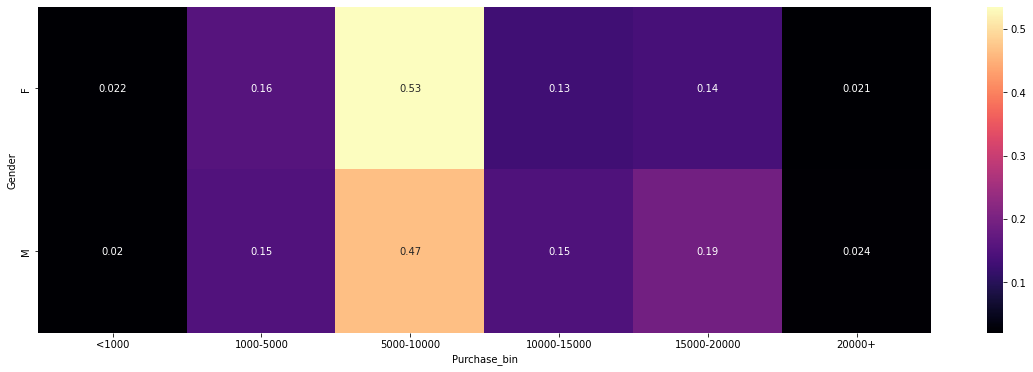

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(pd.crosstab(walmart['Gender'], walmart['Purchase_bin'], normalize='index'), annot=True, cmap='magma')
plt.show()

###<font color="red" style="sans-serif">Conditional Probability, P (Purchase_bin | Gender)</font>

1. Given that the customer is male, the probability of a customer purchasing items worth less than ${\$1000}$ is P (Purchase= <${\$1000}$ | Customer=Male) = 0.02.

2. Given that the customer is male, the probability of a customer purchasing items worth between ${\$1000}$ - ${\$5000}$ is P (Purchase= ${\$1000}$ - ${\$5000}$ | Customer= Male) = 0.15.

2. Given that the customer is male, the probability of a customer purchasing items worth between ${\$5000}$ - ${\$10000}$ is P (Purchase= ${\$5000}$ - ${\$10000}$ | Customer= Male) = 0.47.

3. Given that the customer is male, the probability of a customer purchasing items worth between ${\$10000}$ - ${\$15000}$ is P (Purchase= ${\$10000}$ - ${\$15000}$ | Customer= Male) = 0.15.

4. Given that the customer is male, the probability of a customer purchasing items worth between ${\$15000}$ - ${\$20000}$ is P (Purchase= ${\$15000}$ - ${\$20000}$ | Customer= Male) = 0.19.

5. Given that the customer is male, the probability of a customer purchasing items worth more than ${\$20000}$ is P (Purchase= >${\$20000}$ | Customer= Male) = 0.024.

1. Given that the customer is female, the probability of a customer purchasing items worth less than ${\$1000}$ is P (Purchase= <${\$1000}$ | Customer= Female) = 0.022.

2. Given that the customer is female, the probability of a customer purchasing items worth between \$1000 - \$5000 is P (Purchase= ${\$1000}$ - ${\$5000}$ | Customer= Female) = 0.16.

3. Given that the customer is female, the probability of a customer purchasing items worth between ${\$5000}$ - ${\$10000}$ is P (Purchase= ${\$5000}$ - ${\$10000}$ | Customer= Female) = 0.53.

3. Given that the customer is female, the probability of a customer purchasing items worth between ${\$10000}$ - ${\$15000}$ is P (Purchase= ${\$10000}$ - ${\$15000}$ | Customer= Female) = 0.13.

4. Given that the customer is female, the probability of a customer purchasing items worth between ${\$15000}$ - ${\$20000}$ is P (Purchase= ${\$15000}$ - ${\$20000}$ | Customer= Female) = 0.14.

5. Given that the customer is female, the probability of a customer purchasing items worth more than ${\$20000} is P (Purchase= >${\$20000}$ | Customer= Female) = 0.021.Purchase

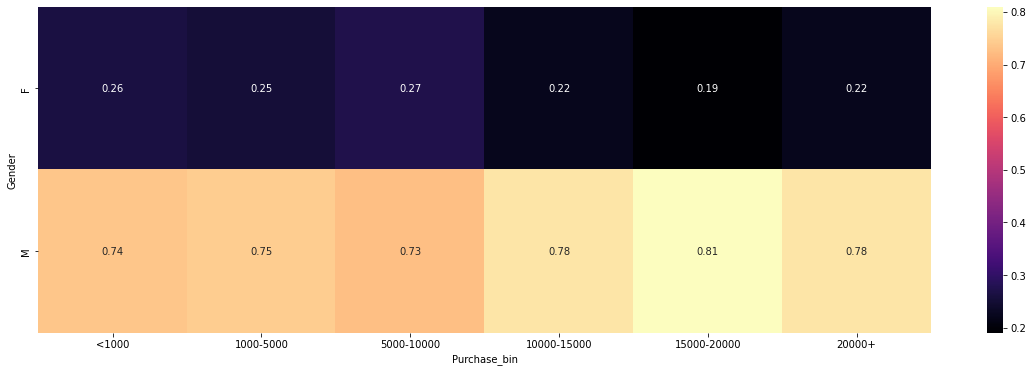

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(pd.crosstab(walmart['Gender'], walmart['Purchase_bin'], normalize='columns'), annot=True, cmap='magma')
plt.show()

###<font color="red" style="sans-serif">Conditional Probability, P (Gender | Purchase_bin)</font>

1. Given that the customer is male, the probability of a customer purchasing items worth less than ${\$1000}$ is P (Gender= Male | Purchase= <${\$1000}$) = 0.74.

2. Given that the customer is female, the probability of a customer purchasing items worth less than ${\$1000}$ is P (Gender=Female | Purchase= <${\$1000}$) = 0.26.

3. Given that the customer is male, the probability of a customer purchasing items worth between ${\$1000}$ and ${\$5000}$ is P (Gender=Male | Purchase= ${\$1000}$ - ${\$5000}$) = 0.75.

4. Given that the customer is female, the probability of a customer purchasing items worth between ${\$1000}$ and ${\$5000}$ is P (Gender=Female | Purchase= ${\$1000}$ - ${\$5000}$) = 0.25.

5. Given that the customer is male, the probability of a customer purchasing items worth between ${\$5000}$ and ${\$10000}$ is P (Gender=Male | Purchase= ${\$5000}$ - 
${\$10000}$) = 0.73.

6. Given that the customer is female, the probability of a customer purchasing items worth between ${\$5000}$ and ${\$10000}$ is P (Gender=Female | Purchase= ${\$5000}$ - ${\$10000}$) = 0.27.

7. Given that the customer is male, the probability of a customer purchasing items worth between ${\$10000}$ and ${\$15000}$ is P (Gender= Male | Purchase= ${\$10000}$ - ${\$15000}$) = 0.78.

8. Given that the customer is female, the probability of a customer purchasing items worth between ${\$10000}$ and ${\$15000}$ is P (Gender= Female | Purchase= ${\$10000}$ - ${\$15000}$) = 0.22.

9. Given that the customer is male, the probability of a customer purchasing items worth between ${\$15000}$ and ${\$20000}$ is P (Gender= Male | Purchase= ${\$15000}$ - ${\$20000}$) = 0.81.

10. Given that the customer is female, the probability of a customer purchasing items worth between ${\$15000}$ and ${\$20000}$ is P (Gender= Female | Purchase= ${\$15000}$ - ${\$20000}$) = 0.19.

11. Given that the customer is male, the probability of a customer purchasing items worth more than ${\$20000}$ is P (Gender=Male | Purchase= >${\$20000}$) = 0.78.

12. Given that the customer is female, the probability of a customer purchasing items worth more than ${\$20000}$ is P (Gender= Female | Purchase= >${\$20000}$) = 0.22.


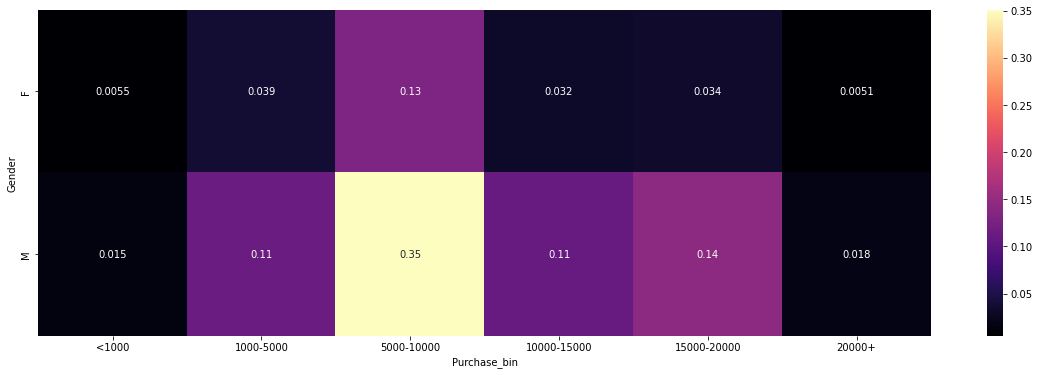

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(pd.crosstab(walmart['Gender'], walmart['Purchase_bin'], normalize=True), annot=True, cmap='magma')
plt.show()

###<font color="red" style="sans-serif">Joint Probability, P(Purchase_bin ⋂ Gender)</font>

1. The probability of the customer being male and falling into the <${\$1000}$ 
purchase bin is P (Customer=Male ⋂ Purchase_bin=${<\$1000}$) = 0.015.

2. The probability of the customer being female and falling into the <${\$1000}$ purchase bin is P (Customer=Male ⋂ Purchase_bin=<${\$1000}$) = 0.0055.

3. The probability of the customer being male and falling in between ${\$1000}$ and ${\$5000}$ purchase bin is P (Customer=Male ⋂ Purchase_bin=${\$1000}$ - ${\$5000}$) = 0.11.

4. The probability of the customer being female and falling in between ${\$1000}$ and ${\$5000}$ purchase bin is P (Customer=Female ⋂ Purchase_bin=${\$1000}$ - ${\$5000}$) = 0.039.

5. The probability of the customer being male and falling in between ${\$5000}$ and ${\$10000}$ purchase bin is P (Customer=Female ⋂ Purchase_bin=${\$5000}$ - ${\$10000}$) = 0.35.

6. The probability of the customer being female and falling in between ${\$5000}$ and ${\$10000}$ purchase bin is P (Customer=Female ⋂ Purchase_bin=${\$5000}$ - ${\$10000}$) = 0.13.

7. The probability of the customer being male and falling in between ${\$10000}$ and ${\$15000}$ purchase bin is P (Customer=Male ⋂ Purchase_bin=${\$10000}$ - ${\$15000}$) = 0.11.

8. The probability of the customer being female and falling in between ${\$10000}$ and ${\$15000}$ purchase bin is P (Customer=Female ⋂ Purchase_bin=${\$10000}$ - ${\$15000}$) = 0.032.

9. The probability of the customer being male and falling in between ${\$15000}$ and ${\$20000}$ purchase bin is P (Customer=Male ⋂ Purchase_bin=${\$15000}$ - ${\$20000}$) = 0.14.

10. The probability of the customer being female and falling in between ${\$15000}$ and ${\$20000}$ purchase bin is P (Customer=Female ⋂ Purchase_bin=${\$15000}$ - ${\$20000}$) = 0.034.

11. The probability of the customer being male and falling into the > ${\$20000}$  purchase bin is P (Customer=Male ⋂ Purchase_bin= >${\$20000}$) = 0.018.

12. The probability of the customer being female and falling into the > ${\$20000}$  purchase bin is P (Customer=female ⋂ Purchase_bin= >${\$20000}$) = 0.0051.

##```Central Limit Theorem (CLT) ```


In [ ]:
# for running simulations on GPU
import cupy as cp

In [ ]:
%cd "drive/MyDrive/Scaler/Case Studies/Walmart"

/content/drive/MyDrive/Scaler/Case Studies/Walmart


In [ ]:
def calculate_confidence_interval(data, ci):
  '''
  Calculates the Confidence Interval (C.I)
  '''
  alpha = 100 - ci
  lower_alpha = np.round(alpha / 2.0, 2)
  higher_alpha = np.round(100 - (lower_alpha), 2)

  return np.round([np.percentile(data, lower_alpha), np.percentile(data, higher_alpha)], 3)

In [ ]:
def sample_means_gpu(r, sample_size, data):
  '''
  Calculates sample means on GPU
  '''
  bs_means = cp.empty(r)
  for i in range(r):
    bs_sample = cp.random.choice(data, size=size)
    bs_means[i] = cp.mean(bs_sample)
  bs_means = cp.asnumpy(bs_means)
  return bs_means


def sample_means_cpu(r, sample_size, data):
  '''
  Calculates sample means on CPU
  '''
  bs_means = np.empty(r)
  for i in range(r):
    bs_sample = np.random.choice(data, size=size)
    bs_means[i] = np.mean(bs_sample)
  # bs_means = np.asnumpy(bs_means)
  return bs_means

In [ ]:
def plot_confidence_interval(data, index, axes):
  '''
  Plots Confidence Line on the graph
  '''
  ci_90_interval = calculate_confidence_interval(data, 90)
  ci_95_interval = calculate_confidence_interval(data, 95)
  ci_99_interval = calculate_confidence_interval(data, 99)

  axes[index].axvline(ci_90_interval[0], linestyle=":", color='g', label="lower_90_CI", alpha=0.9)
  axes[index].axvline(ci_90_interval[1], linestyle=":", color='g', label="upper_90_CI", alpha=0.9)
  axes[index].axvline(ci_95_interval[0], linestyle=":", color='m', label="lower_95_CI", alpha=0.9)
  axes[index].axvline(ci_95_interval[1], linestyle=":", color='m', label="upper_95_CI", alpha=0.9)
  axes[index].axvline(ci_99_interval[0], linestyle=":", color='r', label="lower_99_CI", alpha=0.9)
  axes[index].axvline(ci_99_interval[1], linestyle=":", color='r', label="upper_99_CI", alpha=0.9)

In [ ]:
purchase_female = walmart[(walmart["Gender"] == "F")]["Purchase"]
purchase_male = walmart[(walmart["Gender"] == "M")]["Purchase"]

##```Sampling of 50MM data points (Gender) ```

In [ ]:
r = 5000
size = 50 * (10**6)

female_sample_means = sample_means_gpu(r, size, purchase_female)

male_sample_means = sample_means_gpu(r, size, purchase_male)

np.savez_compressed('genders_50M_sample_means.npz', a=female_sample_means, b=male_sample_means)

In [ ]:
# Loading the sampled means
female_sample_means, male_sample_means = np.load('genders_50M_sample_means.npz')['a'], np.load('genders_50M_sample_means.npz')['b']

In [ ]:
gender_sample_means = dict()
gender_sample_means['F'] = female_sample_means
gender_sample_means['M'] = male_sample_means

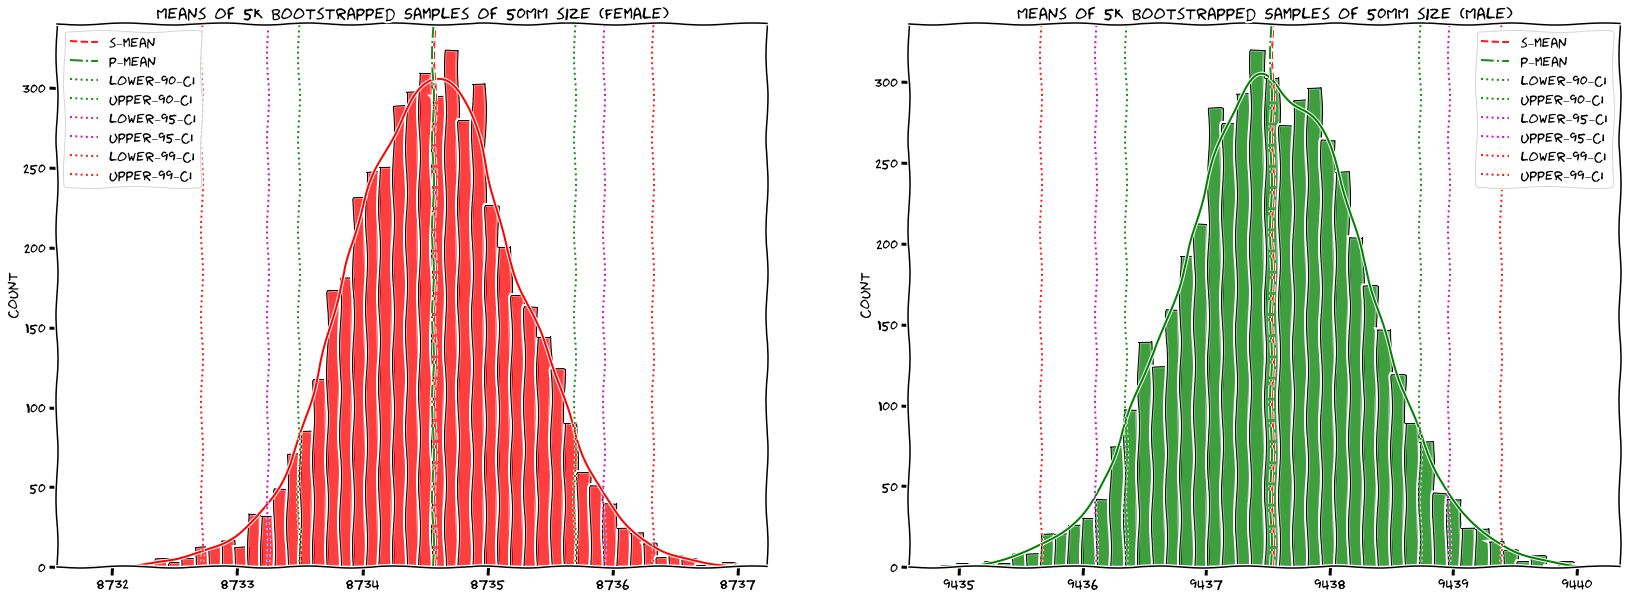

In [ ]:
plt.xkcd()

fig, ax = plt.subplots(1, 2, figsize=(28, 10))
colors = ['r','g','b','y','c', 'm', 'k', 'brown']

axes = ax.ravel()
# plt_grid  = [(0,0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3)]
sns.histplot(gender_sample_means['F'], ax=axes[0], kde=True, color=colors[0])
axes[0].axvline(x=np.mean(gender_sample_means['F']), color="r", linestyle="--", label="s_mean", alpha=0.9)
axes[0].axvline(x=np.mean(purchase_female), color="g", linestyle="-.", label="p_mean", alpha=0.9)
plot_confidence_interval(gender_sample_means['F'], 0, axes)
axes[0].set_title("Means of 5K Bootstrapped Samples of 50MM size (Female)")
axes[0].legend()


sns.histplot(gender_sample_means['M'], ax=axes[1], kde=True, color=colors[1])
axes[1].axvline(x=np.mean(gender_sample_means['M']), color="r", linestyle="--", label="s_mean", alpha=0.9)
axes[1].axvline(x=np.mean(purchase_male), color="g", linestyle="-.", label="p_mean", alpha=0.9)
plot_confidence_interval(gender_sample_means['M'], 1, axes)
axes[1].set_title("Means of 5K Bootstrapped Samples of 50MM size (Male)")
axes[1].legend()
plt.show()

##<font color="red">Inferences</font>

We have taken 5K <b>bootstrapped</b> samples of 50MM data points each, to compare the population and sample means for both genders. From the above graphs, we can see that the population mean and sample mean are very close to each other for both male and female customers at Walmart stores.

The average purchase expenditure of 50MM female and male customers will be 8734.58 and 9437.53, respectively.

Note: The larger the same size, the more resemblance the graph has to a Gaussian Distribution.

##```Are women spending more money per transaction than men? Why or Why not? ```

By comparing the sample and population average of female and male customers, it looks like ```male customers are spending more on the product.```

The following are the reasons for the above conclusions:

1. There is a huge gap between male and female purchasing power.

2. Given that the customer is male, the probability of a customer purchasing items worth between \$10000 and \$15000 is P (Purchase = \$10000-\$15000 | Customer = Male) = 0.15, which is more than females in the same range.

3. Given that the customer is male, the probability of a customer purchasing items worth between \$15000 and \$20000 is P (Purchase = $15000-\$20000 | Customer = Male) = 0.19, which is more than females in the same range.

4. Given that the customer is male, the probability of a customer purchasing items worth more than \$20000 is P (Purchase = > \$20000 | Customer = Male) = 0.024.

5. Given that the customer is male, the probability of a customer purchasing items worth between \$15000 and \$20000 is P (Gender = Male | Purchase = $15000-\$20000) = 0.81.

6. Given that the customer is male, the probability of a customer purchasing items worth between \$10000 and \$15000 is P (Gender= Male | Purchase= \$10000 - \$15000) = 0.78.

##```Confidence intervals and distribution of the mean of the expenses by female and male customers```



In [ ]:
from prettytable import PrettyTable
from prettytable.colortable import ColorTable, Themes

gender_observations = ColorTable(["Gender", "90% C.I", "95% C.I", "99% C.I", "Sample Mean", "Population Mean"], theme=Themes.OCEAN)

for index, gender in enumerate(walmart['Gender'].unique()):
  row = []
  row.append(gender)

  ci_90 = str(calculate_confidence_interval(gender_sample_means[gender], 90)[0]) + " - " + str(calculate_confidence_interval(gender_sample_means[gender], 90)[1])
  ci_95 = str(calculate_confidence_interval(gender_sample_means[gender], 95)[0]) + " - " + str(calculate_confidence_interval(gender_sample_means[gender], 95)[1])
  ci_99 = str(calculate_confidence_interval(gender_sample_means[gender], 99)[0]) + " - " + str(calculate_confidence_interval(gender_sample_means[gender], 99)[1])

  row.append(ci_90)
  row.append(ci_95)
  row.append(ci_99)
  row.append(np.round(np.mean(gender_sample_means[gender]), 3))
  row.append(np.round(np.mean(walmart[walmart['Gender'] == gender]['Purchase']), 3))
  gender_observations.add_row(row)

print(gender_observations)

+--------+---------------------+---------------------+---------------------+-------------+-----------------+
| Gender |       90% C.I       |       95% C.I       |       99% C.I       | Sample Mean | Population Mean |
+--------+---------------------+---------------------+---------------------+-------------+-----------------+
|   F    |   8733.49 - 8735.7  | 8733.244 - 8735.928 |  8732.72 - 8736.326 |   8734.582  |     8734.566    |
|   M    | 9436.347 - 9438.727 | 9436.109 - 9438.963 | 9435.661 - 9439.387 |   9437.537  |     9437.526    |
+--------+---------------------+---------------------+---------------------+-------------+-----------------+


##```Are confidence intervals of average male and female spending overlapping?```

1. Clearly, there is no overlapping in purchasing expenditure between male and female customers.

2. Walmart needs to increase women's purchasing power. They can accomplish this by launching an advertising campaign on women's and mothers' days. 

3. Walmart can provide a weekly discount to female customers.



In [ ]:
purchase_marital_status_0 = walmart[(walmart["Marital_Status"] == 0)]["Purchase"]
purchase_marital_status_1 = walmart[(walmart["Marital_Status"] == 1)]["Purchase"]

##```Sampling of 50K data points (Marital Status)```

In [ ]:
r = 5000
size = 50000

marital_status_0_sample_means = sample_means(r, size, purchase_marital_status_0)
marital_status_1_sample_means = sample_means(r, size, purchase_marital_status_1)

np.savez_compressed('marital_status_50K_sample_means.npz', a=marital_status_0_sample_means, b=marital_status_1_sample_means)

In [ ]:
# Loading the sampled means
marital_status_0_sample_means, marital_status_1_sample_means = np.load("marital_status_50K_sample_means.npz")['a'], np.load("marital_status_50K_sample_means.npz")['b']

In [ ]:
marital_status_sample_means = dict()
marital_status_sample_means[0] = marital_status_0_sample_means
marital_status_sample_means[1] = marital_status_1_sample_means

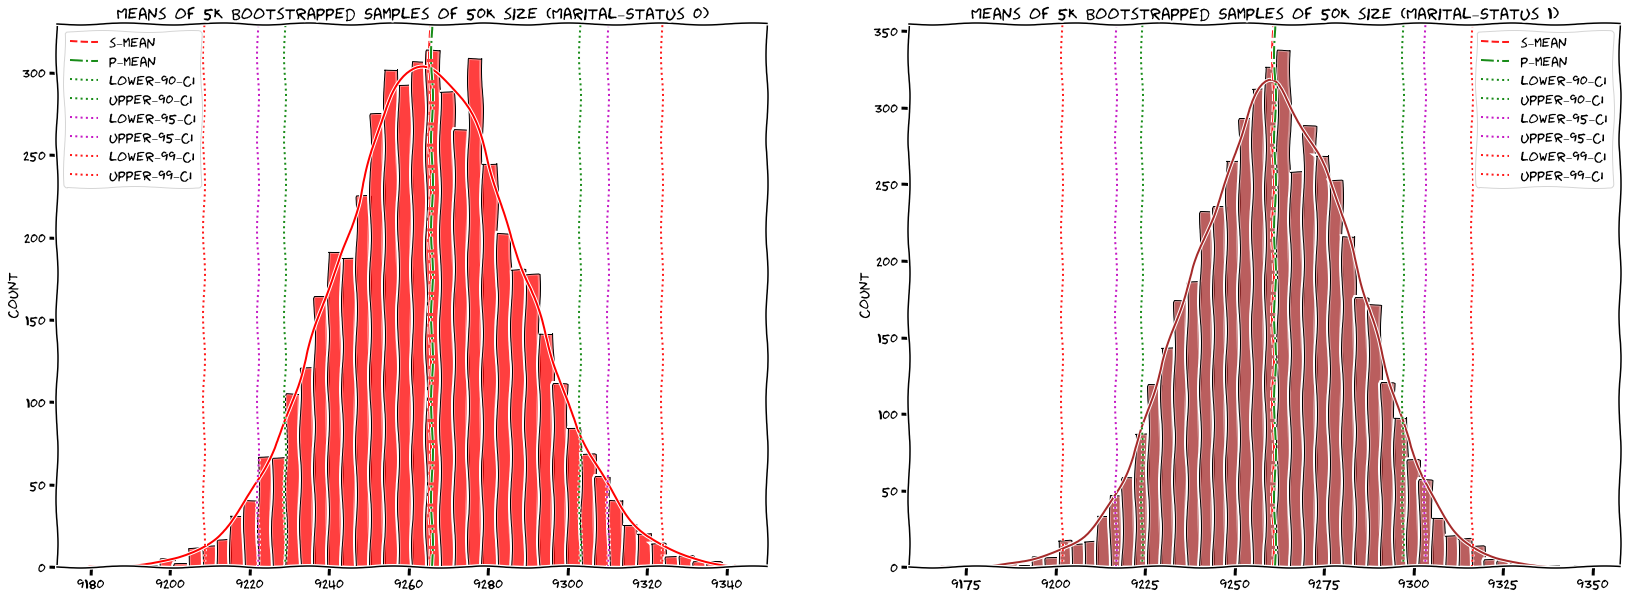

In [ ]:
plt.xkcd()

fig, ax = plt.subplots(1, 2, figsize=(28, 10))
colors = ['r','g','b','y','c', 'm', 'k', 'brown']

axes = ax.ravel()
# plt_grid  = [(0,0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3)]
sns.histplot(marital_status_sample_means[0], ax=axes[0], kde=True, color=colors[0])
axes[0].axvline(x=np.mean(marital_status_sample_means[0]), color="r", linestyle="--", label="s_mean", alpha=0.9)
axes[0].axvline(x=np.mean(walmart[(walmart["Marital_Status"] == 0)]["Purchase"]), color="g", linestyle="-.", label="p_mean", alpha=0.9)
plot_confidence_interval(marital_status_sample_means[0], 0, axes)
axes[0].set_title("Means of 5K Bootstrapped Samples of 50K size (Marital_Status 0)")
axes[0].legend()


sns.histplot(marital_status_sample_means[1], ax=axes[1], kde=True, color=colors[-1])
axes[1].axvline(x=np.mean(marital_status_sample_means[1]), color="r", linestyle="--", label="s_mean", alpha=0.9)
axes[1].axvline(x=np.mean(walmart[(walmart["Marital_Status"] == 1)]["Purchase"]), color="g", linestyle="-.", label="p_mean", alpha=0.9)
plot_confidence_interval(marital_status_sample_means[1], 1, axes)
axes[1].set_title("Means of 5K Bootstrapped Samples of 50K size (Marital_Status 1)")
axes[1].legend()

plt.show()

##```Are Marital Status 0 people spending more money per transaction than status 1? Why or why not? ```

There is no statistically significant difference in purchasing power between married and single people.


##```Confidence intervals and distribution of the mean of the expenses by single and married  customers```



In [ ]:
marital_observations = ColorTable(["Marital_Status", "90% C.I", "95% C.I", "99% C.I", "Sample Mean", "Population Mean"], theme=Themes.OCEAN)

for index, status in enumerate(walmart['Marital_Status'].unique()):
  row = []
  row.append(status)

  ci_90 = str(calculate_confidence_interval(marital_status_sample_means[status], 90)[0]) + " - " + str(calculate_confidence_interval(marital_status_sample_means[status], 90)[1])
  ci_95 = str(calculate_confidence_interval(marital_status_sample_means[status], 95)[0]) + " - " + str(calculate_confidence_interval(marital_status_sample_means[status], 95)[1])
  ci_99 = str(calculate_confidence_interval(marital_status_sample_means[status], 99)[0]) + " - " + str(calculate_confidence_interval(marital_status_sample_means[status], 99)[1])

  row.append(ci_90)
  row.append(ci_95)
  row.append(ci_99)
  row.append(np.round(np.mean(marital_status_sample_means[status]), 3))
  row.append(np.round(np.mean(walmart[walmart['Marital_Status'] == status]['Purchase']), 3))
  marital_observations.add_row(row)

print(marital_observations)

+----------------+---------------------+---------------------+---------------------+-------------+-----------------+
| Marital_Status |       90% C.I       |       95% C.I       |       99% C.I       | Sample Mean | Population Mean |
+----------------+---------------------+---------------------+---------------------+-------------+-----------------+
|       0        | 9228.791 - 9303.148 | 9222.096 - 9310.061 |  9208.57 - 9323.692 |   9265.509  |     9265.908    |
|       1        | 9223.986 - 9297.077 |  9216.84 - 9303.106 | 9201.879 - 9316.394 |   9260.831  |     9261.175    |
+----------------+---------------------+---------------------+---------------------+-------------+-----------------+


##```Are confidence intervals of average married and single people spending overlapping? ```

Clearly, there is overlap between multiple Confidence Intervals (C.I) between married and single customers at Walmart stores.


##```Sampling of 50K data points (Age)```

In [ ]:
import pickle

r = 5000
size = 50000

age_groups = walmart['Age'].unique()
age_data = dict()
age_sample_means = dict()


for index, group in enumerate(age_groups):
  age_data[group] = walmart[walmart['Age'] == group]['Purchase']
  age_sample_means[group] = sample_means_cpu(r, size, age_data[group])


with open('age_50K_sample_means.pickle', 'wb') as handle:
    pickle.dump(age_sample_means, handle, protocol=pickle.HIGHEST_PROTOCOL)


# np.save('age_data_50K_samples.npy', age_data)
# np.save('age_50K_sample_means.npy', age_sample_means)


In [ ]:
# Loading the sample means
import pickle
with open('age_50K_sample_means.pickle', 'rb') as handle:
    age_sample_means = pickle.load(handle)

## ```The spending habits among different age groups of customers at Walmart.```

1. On average, the age group 51–55 spends the most amount of money at Walmart stores, followed by the age group of 55+ and 36–45. The reason for this is that they might be buying medicine or medical equipment along with their regular groceries. 

2. The least average expenditure is among the age group of 0–17, which makes sense, as parents might be buying for them.

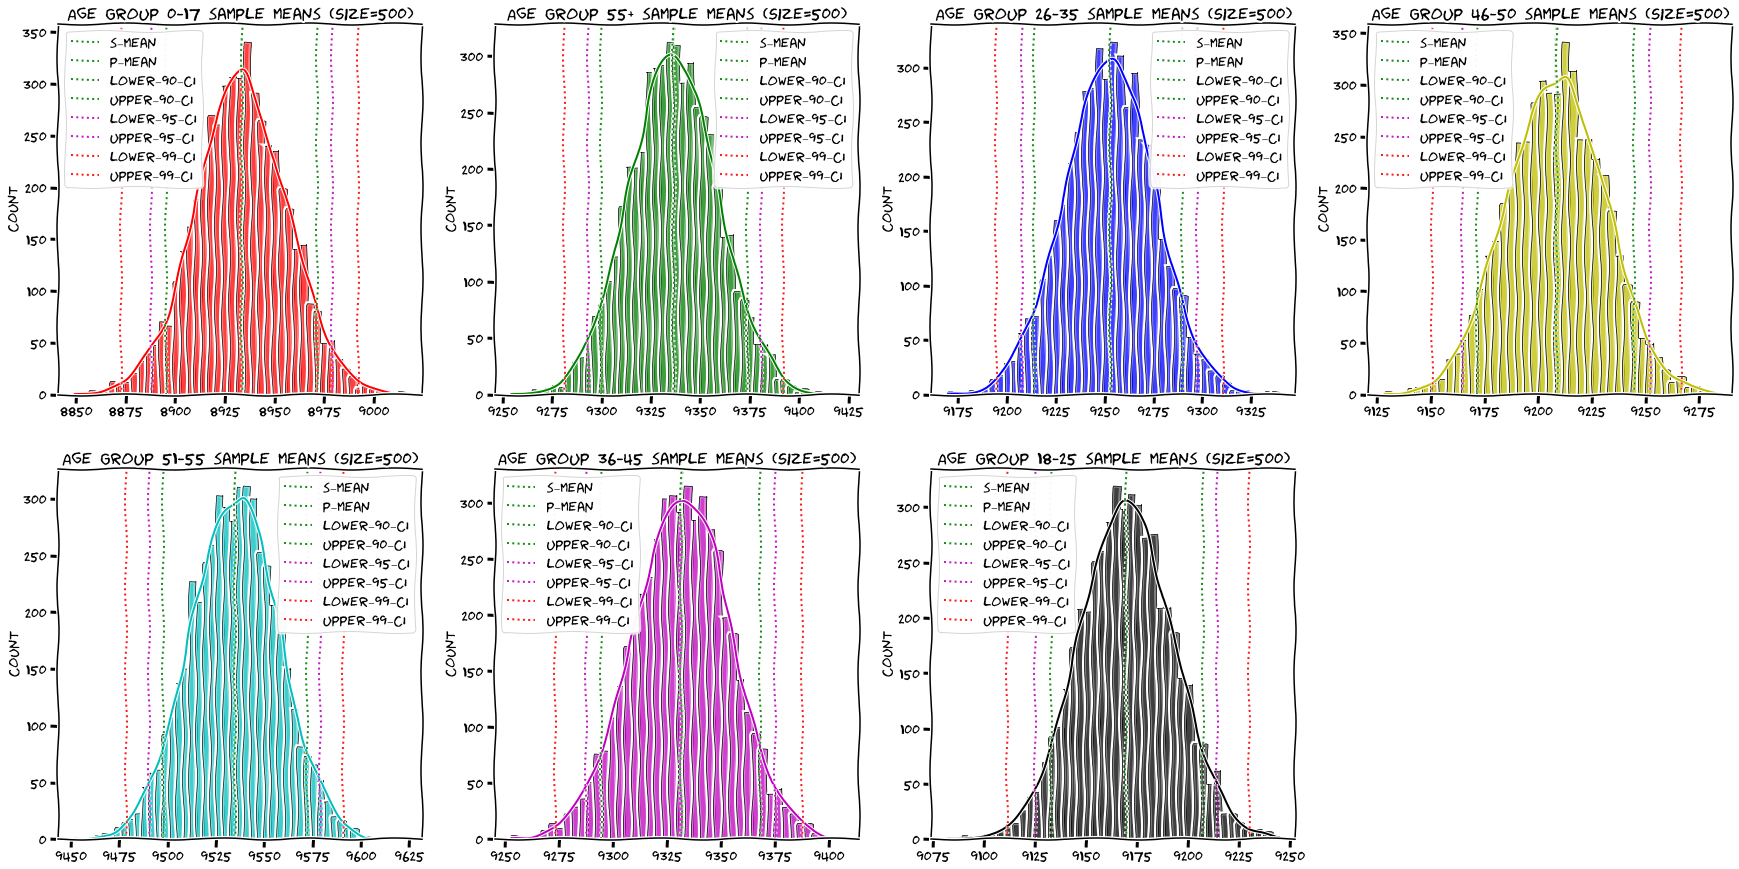

In [ ]:
r = 5000
size = 50000

plt.xkcd()
fig, ax = plt.subplots(2, 4, figsize=(30, 15))
colors = ['r','g','b','y', 'c', 'm', 'k', "brown"]

axes = ax.ravel()
plt_grid  = [(0,0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3)]

age_groups = walmart['Age'].unique()
for index, group in enumerate(age_groups):
  age_data[group] = walmart[walmart['Age'] == group]['Purchase']
  sns.histplot(age_sample_means[group], ax=axes[index], kde=True, color=colors[index])
  axes[index].axvline(np.mean(age_sample_means[group]), linestyle=":", color='g', label="s_mean", alpha=0.9)
  axes[index].axvline(np.mean(age_data[group]), linestyle=":", color='g', label="p_mean", alpha=0.9)
  plot_confidence_interval(age_sample_means[group], index)
  axes[index].legend()
  axes[index].set_title("Age Group " + str(group) + " sample means (Size=50K)")

fig.delaxes(ax[1,3])

##```Confidence intervals and distribution of the mean of the expenses by different age groups.```



In [ ]:
from prettytable.colortable import ColorTable, Themes

age_group_observations = ColorTable(['Group', "90% C.I", "95% C.I", "99% C.I", "Sample Mean", "Population Mean"], theme=Themes.OCEAN)

for index, group in enumerate(walmart['Age'].unique()):
  row = []
  row.append(group)


  ci_90 = str(calculate_confidence_interval(age_sample_means[group], 90)[0]) + " - " + str(calculate_confidence_interval(age_sample_means[group], 90)[1])
  ci_95 = str(calculate_confidence_interval(age_sample_means[group], 95)[0]) + " - " + str(calculate_confidence_interval(age_sample_means[group], 95)[1])
  ci_99 = str(calculate_confidence_interval(age_sample_means[group], 99)[0]) + " - " + str(calculate_confidence_interval(age_sample_means[group], 99)[1])

  row.append(ci_90)
  row.append(ci_95)
  row.append(ci_99)

  row.append(np.round(np.mean(age_sample_means[group]), 3))
  row.append(np.round(np.mean(walmart[walmart['Age'] == group]['Purchase']), 3))

  age_group_observations.add_row(row)


print(age_group_observations)

+-------+---------------------+---------------------+---------------------+-------------+-----------------+
| Group |       90% C.I       |       95% C.I       |       99% C.I       | Sample Mean | Population Mean |
+-------+---------------------+---------------------+---------------------+-------------+-----------------+
|  0-17 | 8895.213 - 8971.353 | 8887.767 - 8978.676 | 8872.443 - 8992.135 |   8933.35   |     8933.465    |
|  55+  | 9299.463 - 9373.555 | 9293.325 - 9380.605 |  9281.048 - 9391.72 |   9336.385  |     9336.28     |
| 26-35 | 9213.807 - 9289.635 | 9207.457 - 9297.249 | 9194.389 - 9310.353 |   9252.444  |     9252.691    |
| 46-50 | 9171.522 - 9244.535 |  9164.688 - 9252.17 | 9150.743 - 9266.293 |   9208.345  |     9208.626    |
| 51-55 | 9497.593 - 9572.216 |  9490.497 - 9578.49 | 9478.654 - 9590.855 |   9534.711  |     9534.808    |
| 36-45 | 9294.417 - 9367.941 | 9287.539 - 9375.101 | 9273.157 - 9387.371 |   9331.727  |     9331.351    |
| 18-25 | 9132.546 - 9207.29

##```Are confidence intervals among different age groups overlapping?```

1. Interestingly, there is no overlap between all the levels of confidence intervals in the age group of 51-55 and 55+, but there is overlap between 55+ and the 36-45 age groups.

2. Clearly, there is no overlap in the age group 0–17 with other age groups.

3. In the remaining age group, there is some overlapping between all levels of confidence intervals.



#```Insights```

1. By using ```the Central Limit Theorem with bootstrapped samples```, we can see that the sample mean of bootstrapped is close to the population mean for all the features w.r.t purchase.

2. The average purchase expenditure of 50MM female and male customers will be 8734.58 and 9437.53, respectively.

3. There is no overlapping in purchasing expenditure between male and female customers.

4. There is no statistically significant difference in purchasing power between married and single people.

5. User ID 1001680 is the most frequent customer, followed by 1004277 and 1001941, respectively.

6. P00265242 is the most popular item in Walmart stores, followed by P00025442 and P00110742, in that order.
 
7. The mid-30s to 40s age range is the second most frequent customer of Walmart, contributing 20% of sales.

8. The majority of customers only stay in the city for one year, making up 35% of the customers.

9. The product category of 5 is the most popular in Walmart stores, making up 27% of sales.
 
10. Customers who relocate within a year spend the least amount of money.
 
11. The average amount spent on Product ID P00086242 is the highest, followed by product IDs P00085342 and P00200642, respectively.
 
12. Female customers who have been in the same city for more than four years have the highest average expenditure compared to those who have been there for less than four years.

13. There are a lot of males and females in the age range of 26–35.
 
14. The majority of females prefer to stay in the same city for 2-3 years. while the majority of males prefer to stay in the same city for roughly 3–4+ years.
 
15. In 35% of the product categories (3, 6, 7, 8, 11, 15, 17), there are no **outliers** in terms of purchase.

#```Recommendations```

1. Walmart needs to increase women's purchasing power. They can accomplish this by launching an advertising campaign on women's and mothers' days to buy products for their families.

2. No product category has more than 50% of the market; only a few products are in the category whose sales are greater than 20%. Walmart needs to increase the sales of the product by offering weekly or monthly discounts, effectively making more revenue.

3. The city category A generates the fewest sales, probably because of low income, customers or fewer stores in the city. Walmart needs to run a survey in these cities
about the impact of customer behavior.

4. Walmart needs to target customers from the male age groups of 0-17, 46-50, and 26-54. Female customers should be between the ages of 0 and 17, 18 to 25, and 26 to 35.